# Resultados simulaciones

Se revisan los resultados de las simulaciones del modelo original de Brian Arthur, barriendo los parámetros `numero de rondas de memoria` ($d$) y `tamaño bolsa predictores` ($k$).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simulaciones con 1 predictor variando memoria:

In [2]:
###############
# Predictores
k = 1 
# Conectividad
p = '0.0'
###############
names=['Memoria','Num_predic','Identificador','Ronda','Agente','Estado','Puntaje','Politica']
df_list = []
memoria = [1, 3, 6, 9, 12, 15, 18]
for d in memoria:
    print(f"Leyendo datos sweep memoria {d} y predictores {k}")
    archivo = './data/simulacion-' + str(d) + "-" + str(k) + '-' + p + ".csv"
    print(f"Cargando datos de archivo {archivo}...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
        
data = pd.concat(df_list)
data = data.iloc[1:]
data = data.dropna()
data['Memoria'] = data['Memoria'].astype(int)
data['Num_predic'] = data['Num_predic'].astype(int)
data['Identificador'] = data['Identificador'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
data['Politica'] = data['Politica'].astype(str)
data.head()

Leyendo datos sweep memoria 1 y predictores 1
Cargando datos de archivo ./data/simulacion-1-1-0.0.csv...


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Listo
Leyendo datos sweep memoria 3 y predictores 1
Cargando datos de archivo ./data/simulacion-3-1-0.0.csv...
Listo
Leyendo datos sweep memoria 6 y predictores 1
Cargando datos de archivo ./data/simulacion-6-1-0.0.csv...
Listo
Leyendo datos sweep memoria 9 y predictores 1
Cargando datos de archivo ./data/simulacion-9-1-0.0.csv...
Listo
Leyendo datos sweep memoria 12 y predictores 1
Cargando datos de archivo ./data/simulacion-12-1-0.0.csv...
Listo
Leyendo datos sweep memoria 15 y predictores 1
Cargando datos de archivo ./data/simulacion-15-1-0.0.csv...
Listo
Leyendo datos sweep memoria 18 y predictores 1
Cargando datos de archivo ./data/simulacion-18-1-0.0.csv...
Listo


Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
1        1           1              0      0       0       1        1   
2        1           1              0      1       0       1       -1   
3        1           1              0      2       0       0        0   
4        1           1              0      3       0       1       -1   
5        1           1              0      4       0       0        0   

    Politica  
1  1-ciclico  
2  1-ciclico  
3  1-ciclico  
4  1-ciclico  
5  1-ciclico

### Verificamos correctitud de los datos

In [3]:
data.shape

(7000000, 8)

In [4]:
data['Memoria'].value_counts()

18    1000000
15    1000000
12    1000000
9     1000000
6     1000000
3     1000000
1     1000000
Name: Memoria, dtype: int64

In [5]:
data['Agente'].value_counts()

99    70000
36    70000
26    70000
27    70000
28    70000
      ...  
69    70000
70    70000
71    70000
72    70000
0     70000
Name: Agente, Length: 100, dtype: int64

**Asistencia**

Text(0.5, 0.98, '1 predictor')

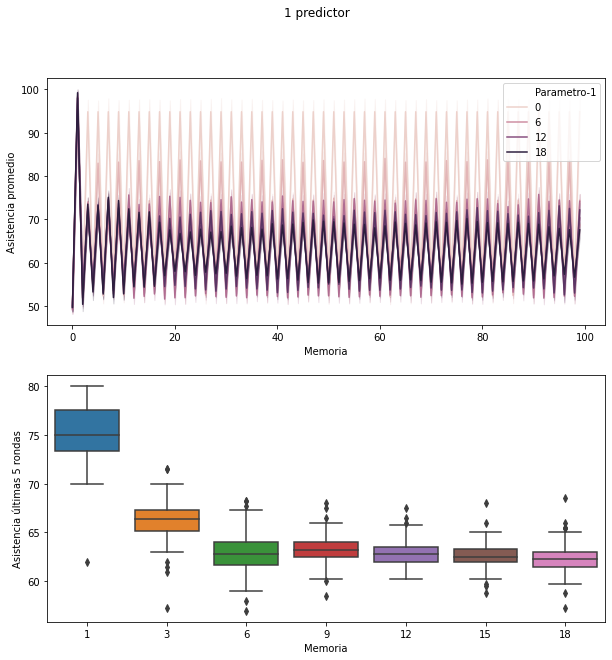

In [6]:
data['Parametro-1'] = data['Memoria']
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux1 = aux[aux['Ronda'] > rondas[-5]]
aux1 = aux1.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux1.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'], hue=aux['Parametro-1'], ax=ax[0])
sns.boxplot(x=aux1['Parametro-1'], y=aux1['Asistencia_total'], ax=ax[1])
ax[0].set_xlabel('Memoria')
#ax[0].set_ylim(50, 85)
ax[0].set_ylabel('Asistencia promedio')
#ax[0].set_title('Todas las rondas')
ax[1].set_xlabel('Memoria')
#ax[1].set_ylim(50, 85)
ax[1].set_ylabel('Asistencia últimas 5 rondas')
#ax[1].set_title('Ultimas 5 rondas')
fig.suptitle('1 predictor')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima promedio')

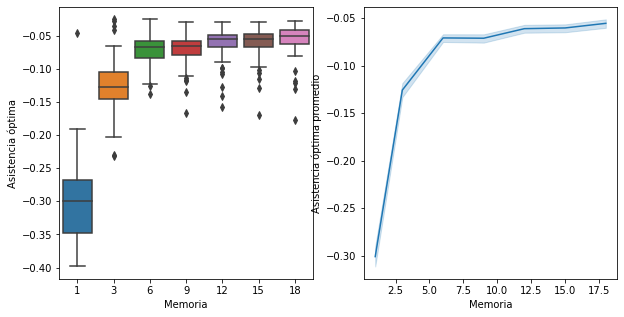

In [7]:
mu = 0.6
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (mu - aux['Asistencia'])#*(mu - aux['Asistencia'])
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = 2 * df['diferencia_con_umbral']/num_rondas
#df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Asistencia óptima')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Asistencia óptima promedio')

#### Recompensa total

In [8]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado
0            1              0               0.7801
1            1              1               0.7851
2            1              2               0.7507
3            1              3               0.7840
4            1              4               0.7506

Text(0, 0.5, 'Puntaje NORMALIZADO promedio')

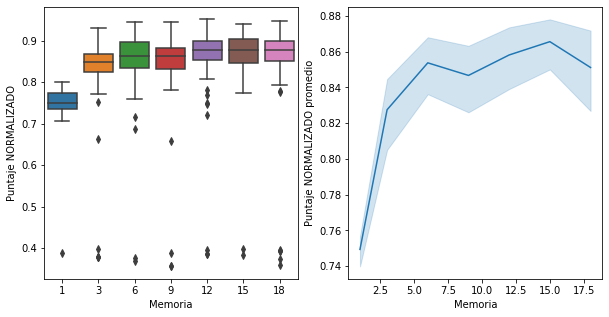

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Puntaje NORMALIZADO')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Puntaje NORMALIZADO promedio')

#### Distribución de la recompensa

In [10]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [11]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado  Gini
0            1              0               0.7801   0.0
1            1              1               0.7851   0.0
2            1              2               0.7507   0.0
3            1              3               0.7840   0.0
4            1              4               0.7506   0.0

Text(0, 0.5, 'Índice de Gini')

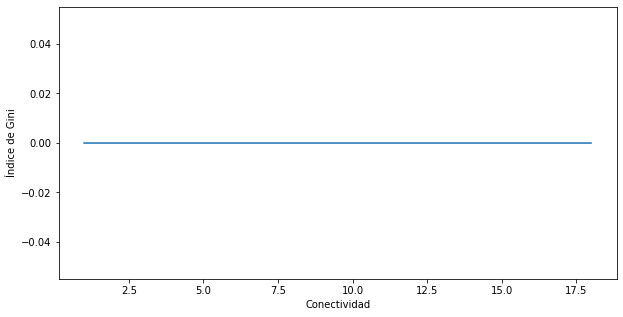

In [12]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [13]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

Parametro-1  Ronda      Politica_lag  cantidad_agentes
0            1      0         1-ciclico             24.68
1            1      0  1-ciclico-espejo             25.53

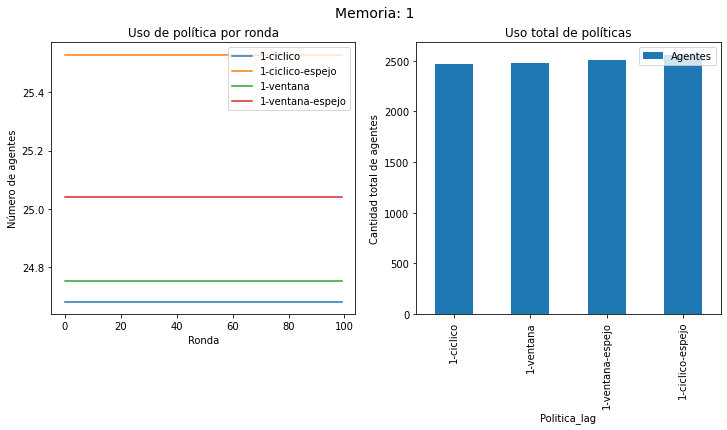

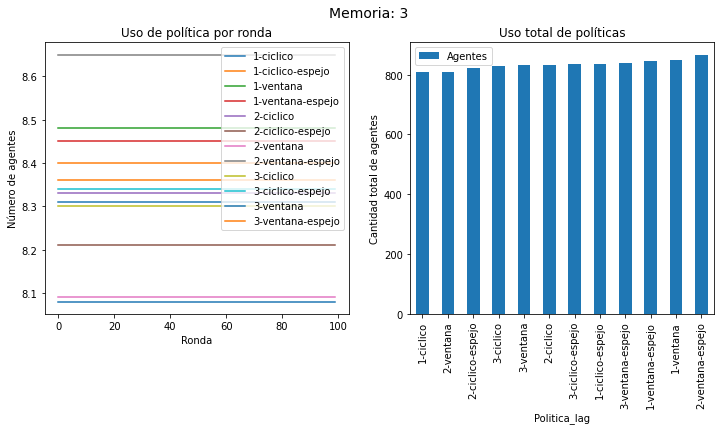

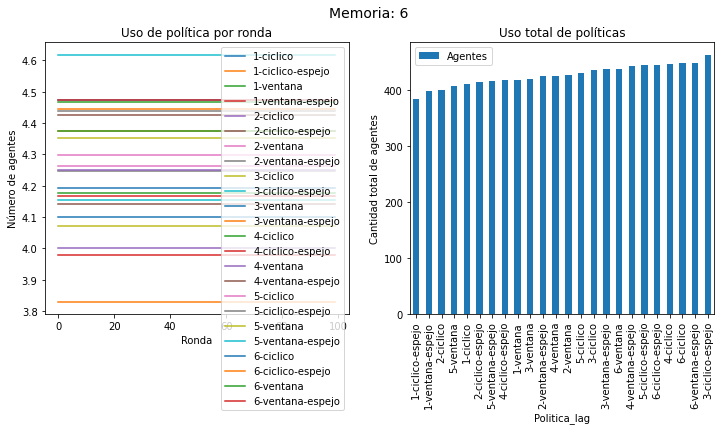

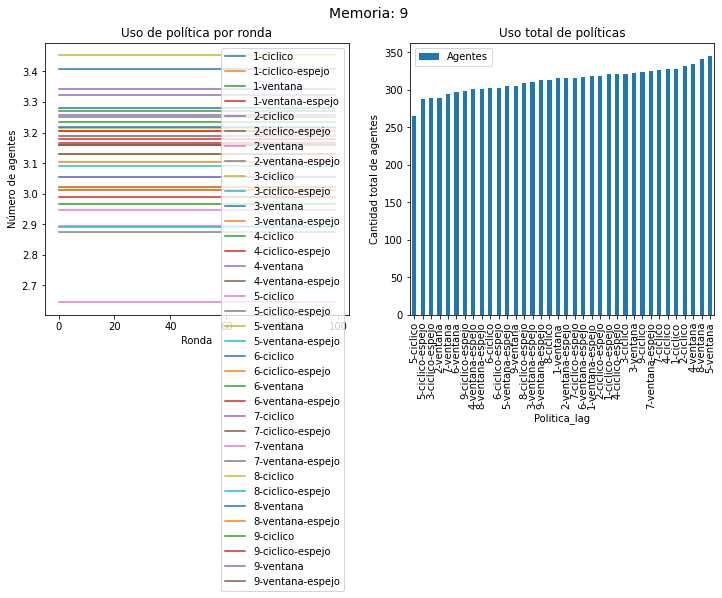

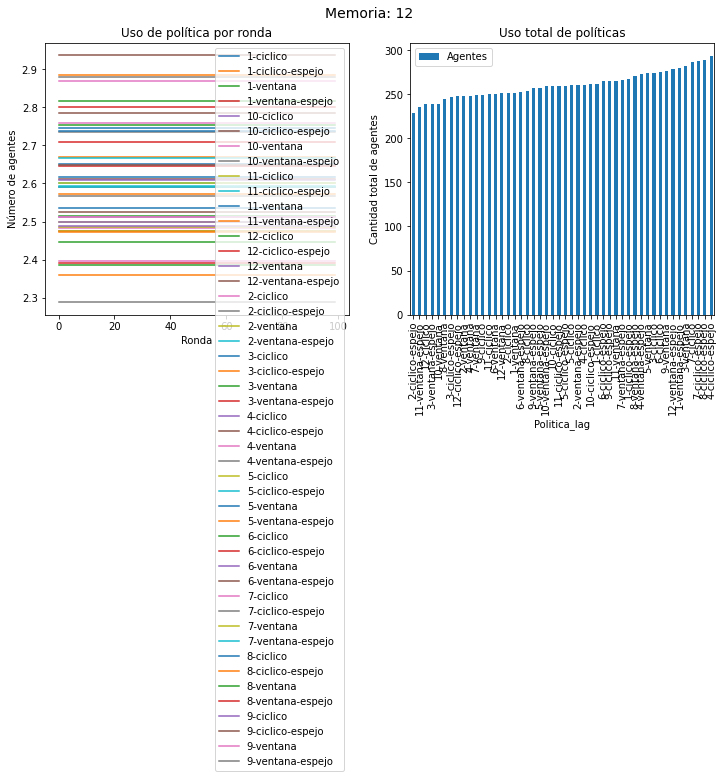

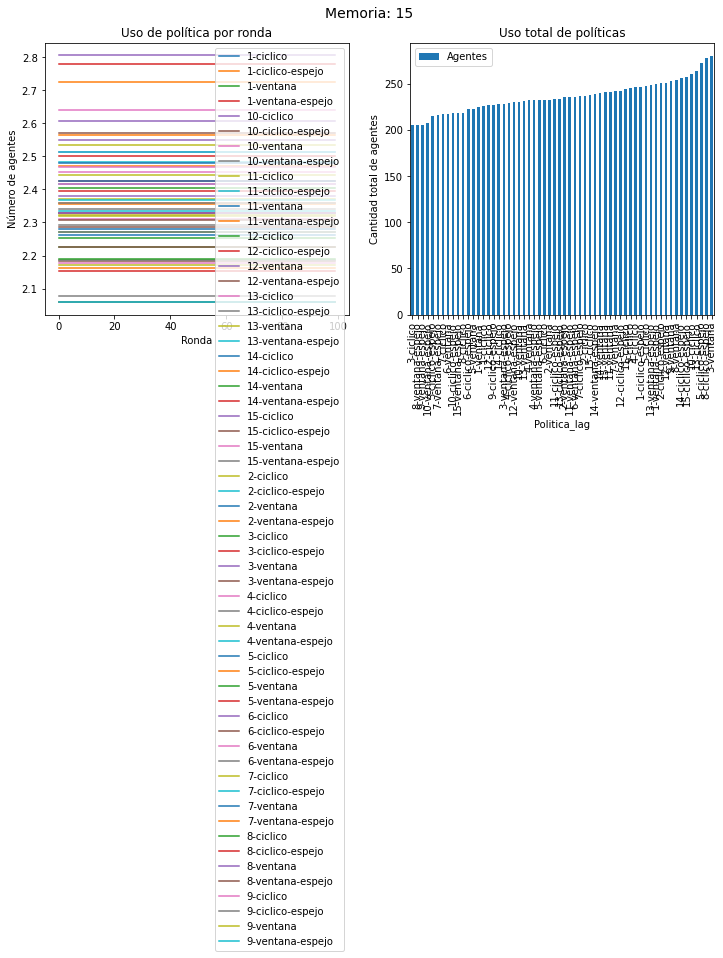

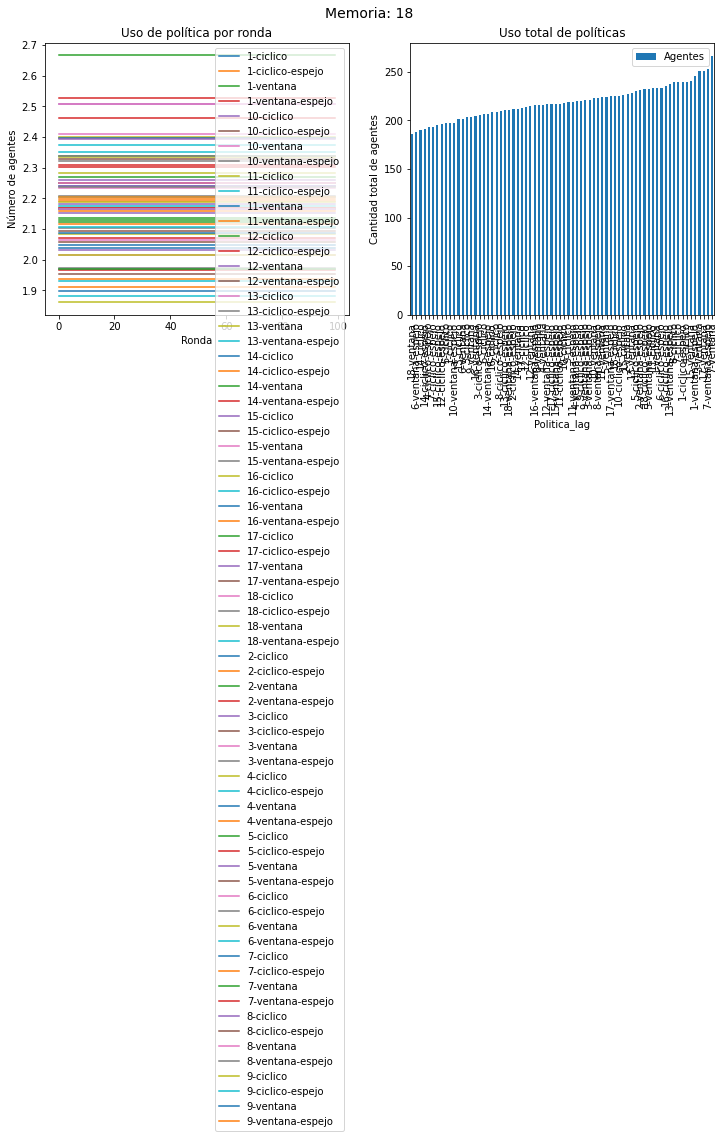

In [14]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.sort_values(by='cantidad_agentes', inplace=True)
    df1.columns = ['Agentes']
    #ax[1].plot(df.index, df['Agentes'])
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Memoria: ' + str(r), fontsize=14)

In [15]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

Parametro-1 Politica_lag  Identificador   Puntaje
0            1    1-ciclico              0 -0.488522
1            1    1-ciclico              1 -0.490505
2            1    1-ciclico              2 -0.488485
3            1    1-ciclico              3 -0.491736
4            1    1-ciclico              4 -0.489478

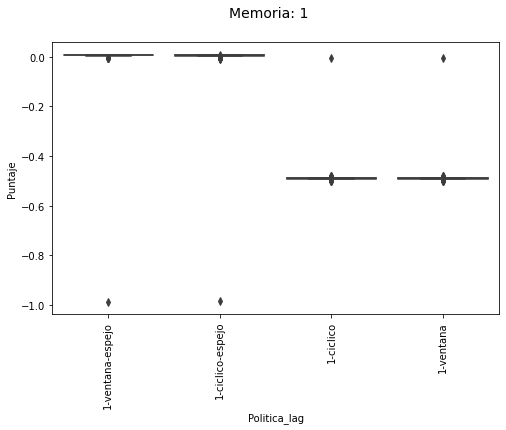

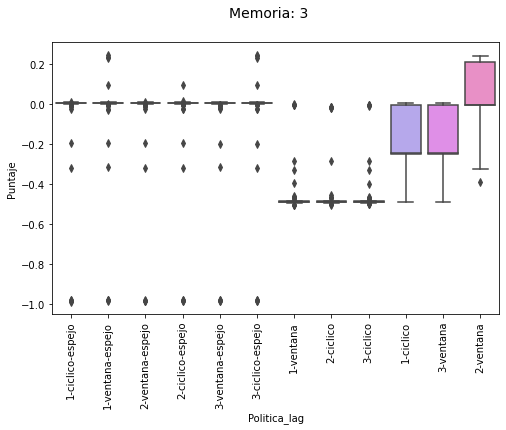

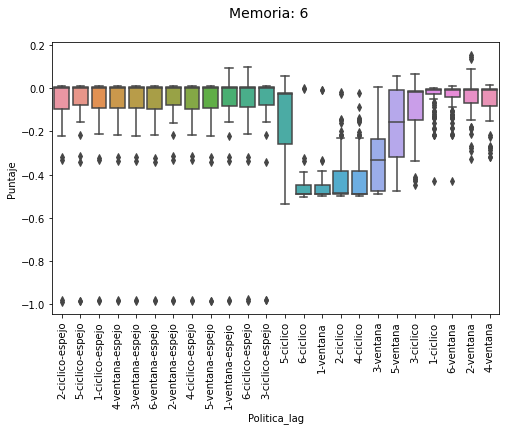

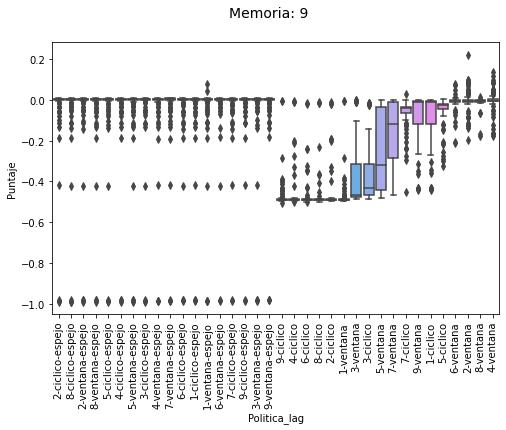

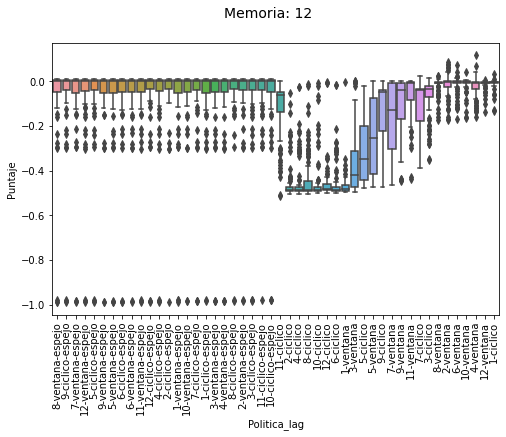

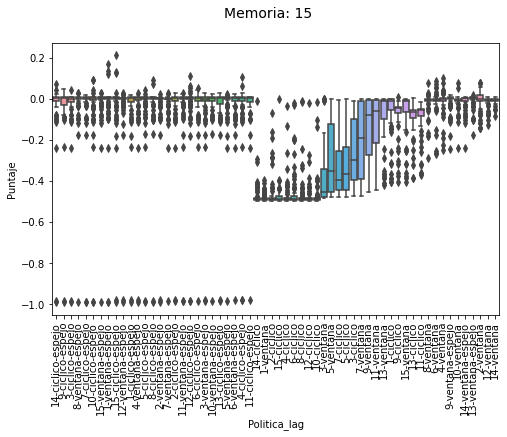

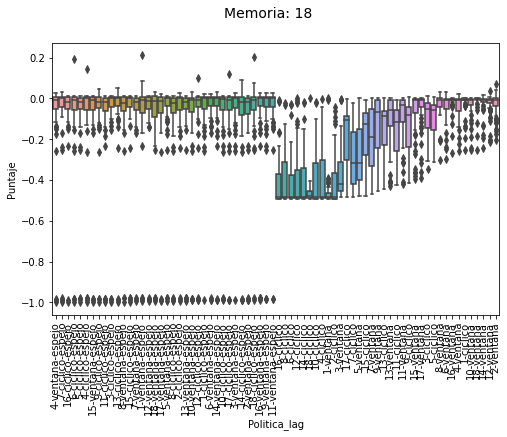

In [16]:
for p, Grp in df.groupby('Parametro-1'):
    grp = Grp.sort_values(by='Puntaje')
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Memoria: ' + str(p), fontsize=14)
    plt.xticks(rotation=90)

In [17]:
df = data.groupby(['Memoria', 'Identificador', 'Agente'])['Puntaje'].sum().reset_index()
df.sort_values(by='Puntaje', inplace=True)
df.head()

Memoria  Identificador  Agente  Puntaje
63865       18          40038      65     -100
63878       18          40038      78     -100
63830       18          40038      30     -100
63829       18          40038      29     -100
63827       18          40038      27     -100

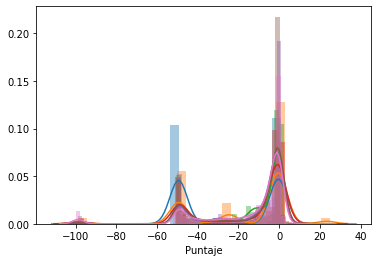

In [18]:
for key, grp in df.groupby('Memoria'):
    sns.distplot(grp['Puntaje'])

## Simulaciones con 3 predictores variando memoria:

In [19]:
###############
# Predictores
k = 3 
# Conectividad
p = '0.0'
###############
names=['Memoria','Num_predic','Identificador','Ronda','Agente','Estado','Puntaje','Politica']
df_list = []
memoria = [1, 3, 6, 9, 12, 15, 18]
for d in memoria:
    print(f"Leyendo datos sweep memoria {d} y predictores {k}")
    archivo = './data/simulacion-' + str(d) + "-" + str(k) + '-' + p + ".csv"
    print(f"Cargando datos de archivo {archivo}...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
         
data = pd.concat(df_list)
#data = data.iloc[1:]
data = data.dropna()
data['Memoria'] = data['Memoria'].astype(int)
data['Num_predic'] = data['Num_predic'].astype(int)
data['Identificador'] = data['Identificador'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
data['Politica'] = data['Politica'].astype(str)
data.head()

Leyendo datos sweep memoria 1 y predictores 3
Cargando datos de archivo ./data/simulacion-1-3-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 3 y predictores 3
Cargando datos de archivo ./data/simulacion-3-3-0.0.csv...
Listo
Leyendo datos sweep memoria 6 y predictores 3
Cargando datos de archivo ./data/simulacion-6-3-0.0.csv...
Listo
Leyendo datos sweep memoria 9 y predictores 3
Cargando datos de archivo ./data/simulacion-9-3-0.0.csv...
Listo
Leyendo datos sweep memoria 12 y predictores 3
Cargando datos de archivo ./data/simulacion-12-3-0.0.csv...
Listo
Leyendo datos sweep memoria 15 y predictores 3
Cargando datos de archivo ./data/simulacion-15-3-0.0.csv...
Listo
Leyendo datos sweep memoria 18 y predictores 3
Cargando datos de archivo ./data/simulacion-18-3-0.0.csv...
Listo


Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        3           3           4000      0       0       0        0   
1        3           3           4000      1       0       1       -1   
2        3           3           4000      2       0       0        0   
3        3           3           4000      3       0       1        1   
4        3           3           4000      4       0       1       -1   

           Politica  
0         2-ciclico  
1         3-ventana  
2  1-ciclico-espejo  
3  1-ciclico-espejo  
4  1-ciclico-espejo

### Verificamos correctitud de los datos

In [20]:
data.shape

(6000000, 8)

In [21]:
data['Memoria'].value_counts()

18    1000000
15    1000000
12    1000000
9     1000000
6     1000000
3     1000000
Name: Memoria, dtype: int64

In [22]:
data['Agente'].value_counts()

99    60000
36    60000
26    60000
27    60000
28    60000
      ...  
69    60000
70    60000
71    60000
72    60000
0     60000
Name: Agente, Length: 100, dtype: int64

**Asistencia**

Text(0.5, 0.98, '3 predictores')

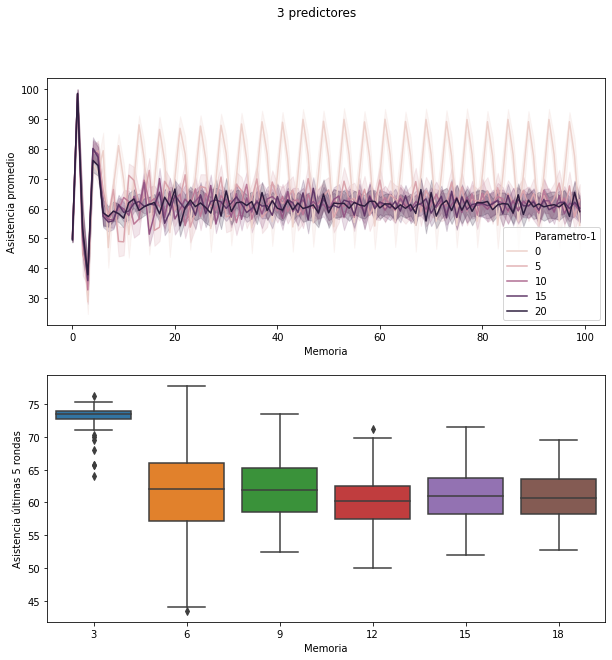

In [23]:
data['Parametro-1'] = data['Memoria']
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux1 = aux[aux['Ronda'] > rondas[-5]]
aux1 = aux1.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux1.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'], hue=aux['Parametro-1'], ax=ax[0])
sns.boxplot(x=aux1['Parametro-1'], y=aux1['Asistencia_total'], ax=ax[1])
ax[0].set_xlabel('Memoria')
#ax[0].set_ylim(50, 85)
ax[0].set_ylabel('Asistencia promedio')
#ax[0].set_title('Todas las rondas')
ax[1].set_xlabel('Memoria')
#ax[1].set_ylim(50, 85)
ax[1].set_ylabel('Asistencia últimas 5 rondas')
#ax[1].set_title('Ultimas 5 rondas')
fig.suptitle('3 predictores')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima promedio')

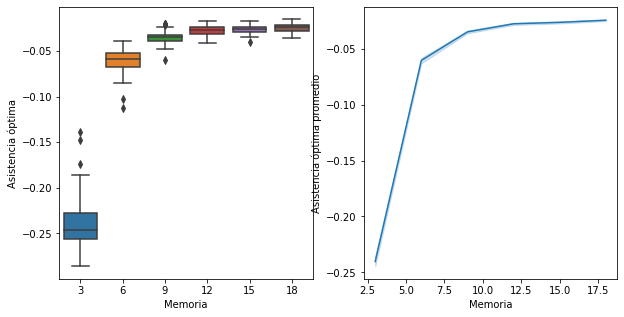

In [24]:
mu = 0.6
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (mu - aux['Asistencia'])#*(mu - aux['Asistencia'])
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = 2 * df['diferencia_con_umbral']/num_rondas
#df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Asistencia óptima')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Asistencia óptima promedio')

#### Recompensa total

In [25]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado
0            3           4000               0.4835
1            3           4001               0.4268
2            3           4002               0.3097
3            3           4003               0.3567
4            3           4004               0.4129

Text(0, 0.5, 'Puntaje NORMALIZADO promedio')

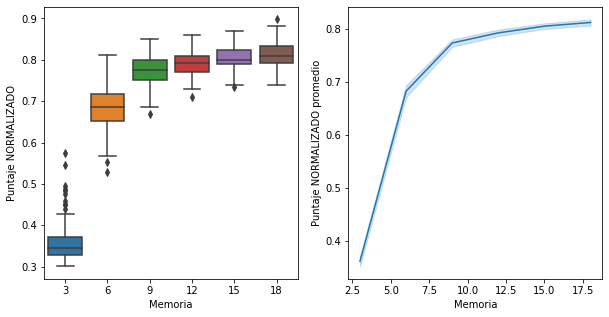

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Puntaje NORMALIZADO')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Puntaje NORMALIZADO promedio')

#### Distribución de la recompensa

In [27]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [28]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado  Gini
0            3           4000               0.4835   0.0
1            3           4001               0.4268   0.0
2            3           4002               0.3097   0.0
3            3           4003               0.3567   0.0
4            3           4004               0.4129   0.0

Text(0, 0.5, 'Índice de Gini')

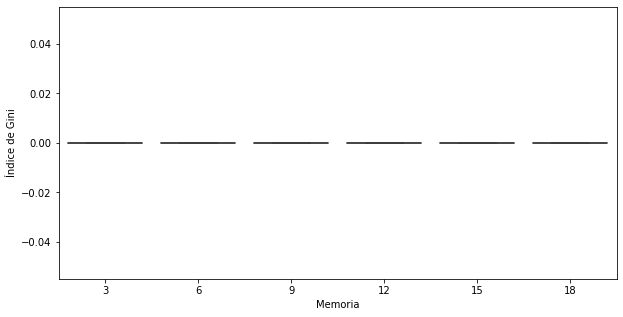

In [29]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Memoria')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [30]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

Parametro-1  Ronda      Politica_lag  cantidad_agentes
0            3      0         1-ciclico              8.15
1            3      0  1-ciclico-espejo              8.43

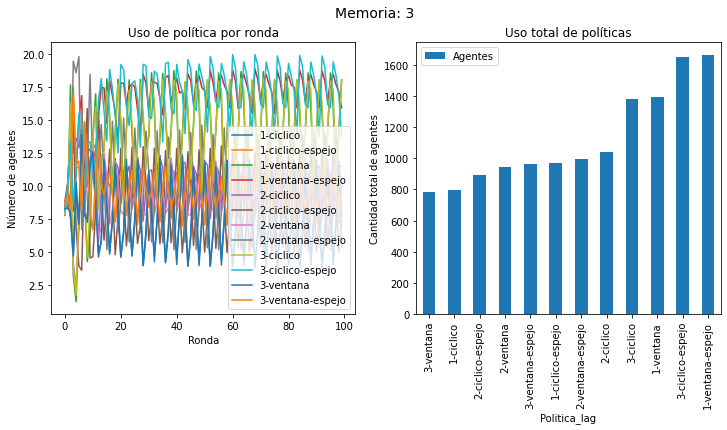

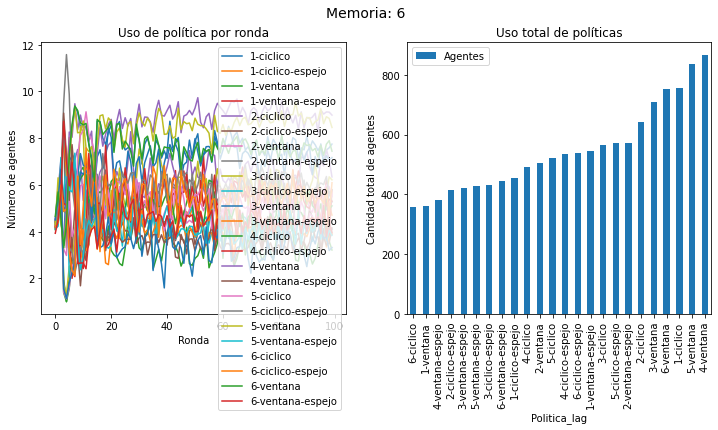

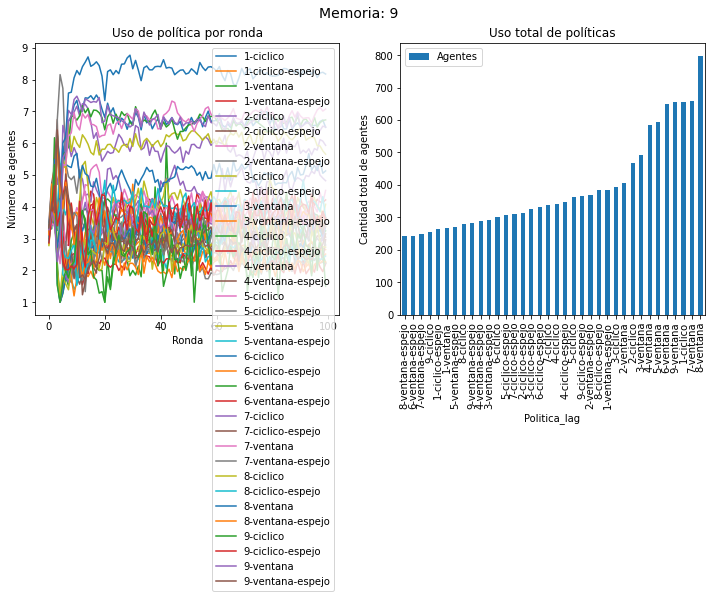

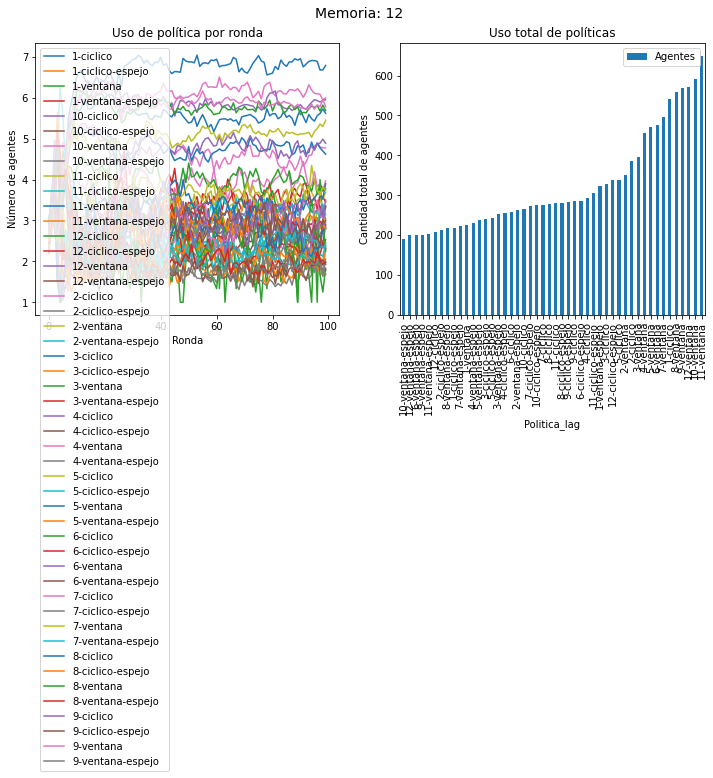

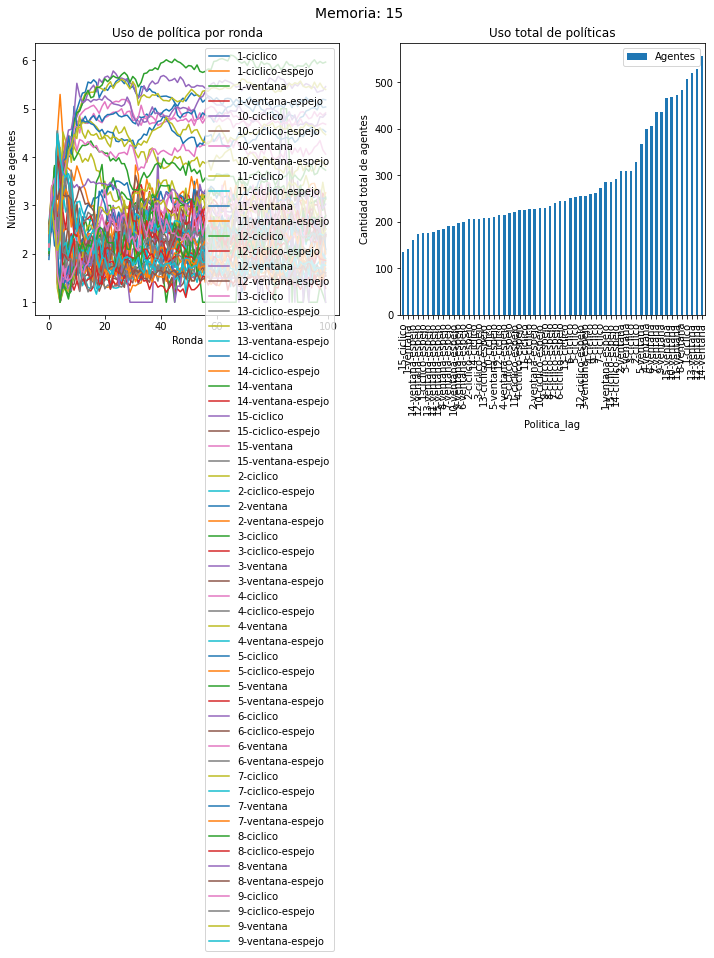

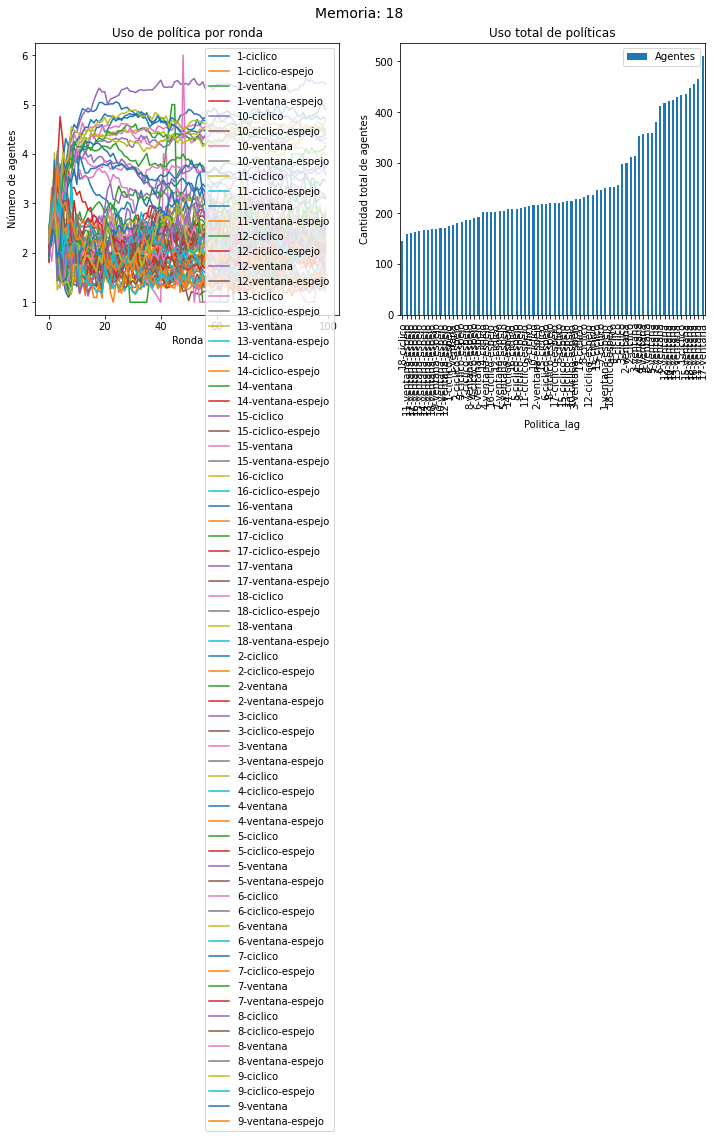

In [31]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.sort_values(by='cantidad_agentes', inplace=True)
    df1.columns = ['Agentes']
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Memoria: ' + str(r), fontsize=14)

In [32]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

Parametro-1 Politica_lag  Identificador   Puntaje
0            3    1-ciclico           4000 -0.592934
1            3    1-ciclico           4001 -0.686499
2            3    1-ciclico           4002 -0.728814
3            3    1-ciclico           4003 -0.618952
4            3    1-ciclico           4004 -0.622068

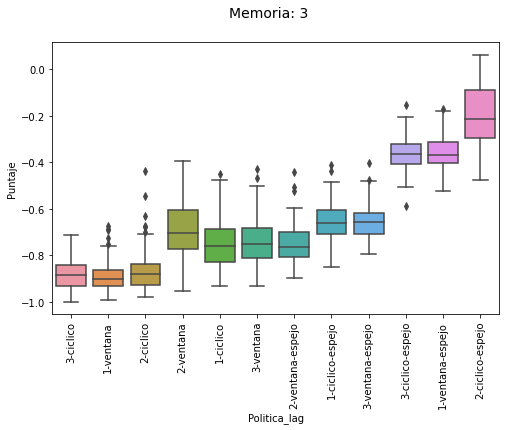

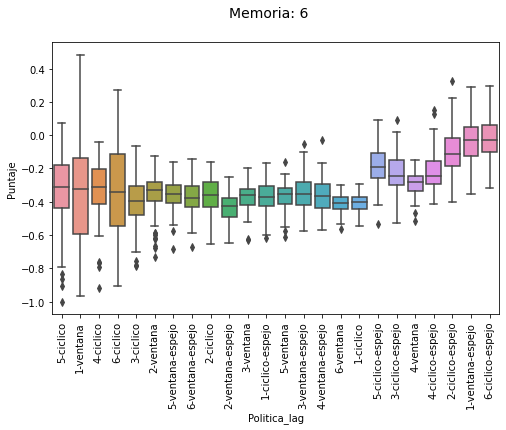

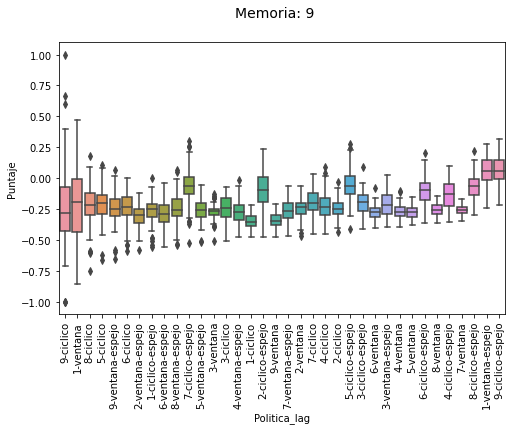

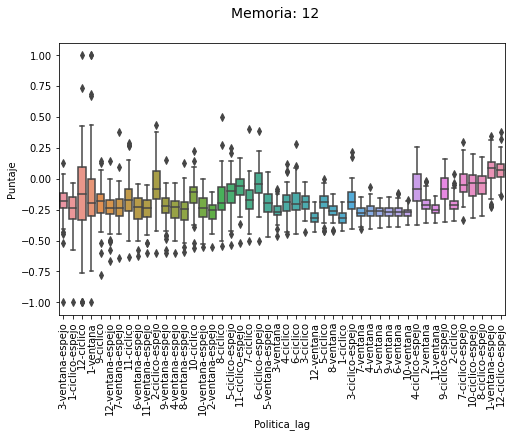

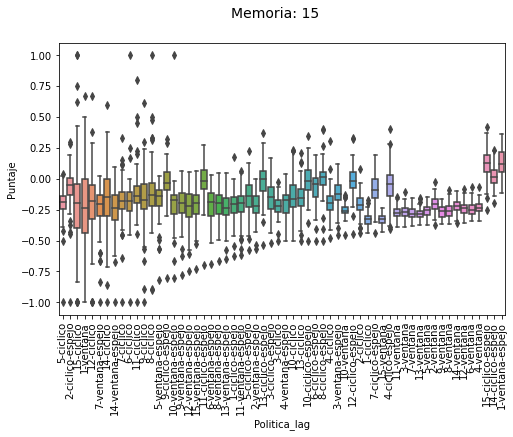

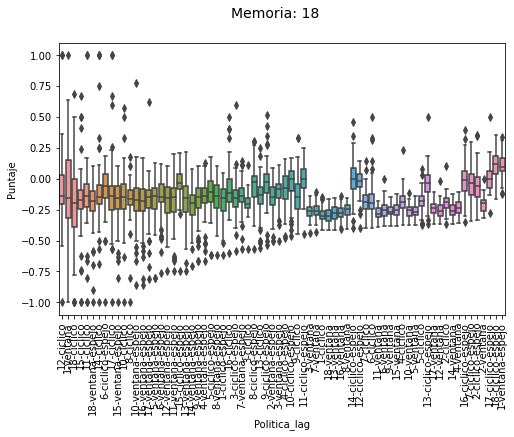

In [33]:
for p, Grp in df.groupby('Parametro-1'):
    grp = Grp.sort_values(by='Puntaje')
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Memoria: ' + str(p), fontsize=14)
    plt.xticks(rotation=90)
    

## Simulaciones con 6 predictores variando memoria:

In [34]:
###############
# Predictores
k = 6 
# Conectividad
p = '0.0'
###############
names=['Memoria','Num_predic','Identificador','Ronda','Agente','Estado','Puntaje','Politica']
df_list = []
memoria = [1, 3, 6, 9, 12, 15, 18]
for d in memoria:
    print(f"Leyendo datos sweep memoria {d} y predictores {k}")
    archivo = './data/simulacion-' + str(d) + "-" + str(k) + '-' + p + ".csv"
    print(f"Cargando datos de archivo {archivo}...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
 
data = pd.concat(df_list)
#data = data.iloc[1:]
data = data.dropna()
data['Memoria'] = data['Memoria'].astype(int)
data['Num_predic'] = data['Num_predic'].astype(int)
data['Identificador'] = data['Identificador'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
data['Politica'] = data['Politica'].astype(str)
data.head()

Leyendo datos sweep memoria 1 y predictores 6
Cargando datos de archivo ./data/simulacion-1-6-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 3 y predictores 6
Cargando datos de archivo ./data/simulacion-3-6-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 6 y predictores 6
Cargando datos de archivo ./data/simulacion-6-6-0.0.csv...
Listo
Leyendo datos sweep memoria 9 y predictores 6
Cargando datos de archivo ./data/simulacion-9-6-0.0.csv...
Listo
Leyendo datos sweep memoria 12 y predictores 6
Cargando datos de archivo ./data/simulacion-12-6-0.0.csv...
Listo
Leyendo datos sweep memoria 15 y predictores 6
Cargando datos de archivo ./data/simulacion-15-6-0.0.csv...
Listo
Leyendo datos sweep memoria 18 y predictores 6
Cargando datos de archivo ./data/simulacion-18-6-0.0.csv...
Listo


Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        6           6          10000      0       0       0        0   
1        6           6          10000      1       0       0        0   
2        6           6          10000      2       0       1       -1   
3        6           6          10000      3       0       0        0   
4        6           6          10000      4       0       0        0   

           Politica  
0         4-ventana  
1         4-ciclico  
2         4-ventana  
3  6-ciclico-espejo  
4  1-ciclico-espejo

### Verificamos correctitud de los datos

In [35]:
data.shape

(5000000, 8)

In [36]:
data['Memoria'].value_counts()

18    1000000
15    1000000
12    1000000
9     1000000
6     1000000
Name: Memoria, dtype: int64

In [37]:
data['Agente'].value_counts()

99    50000
36    50000
26    50000
27    50000
28    50000
      ...  
69    50000
70    50000
71    50000
72    50000
0     50000
Name: Agente, Length: 100, dtype: int64

**Asistencia**

Text(0.5, 0.98, '6 predictores')

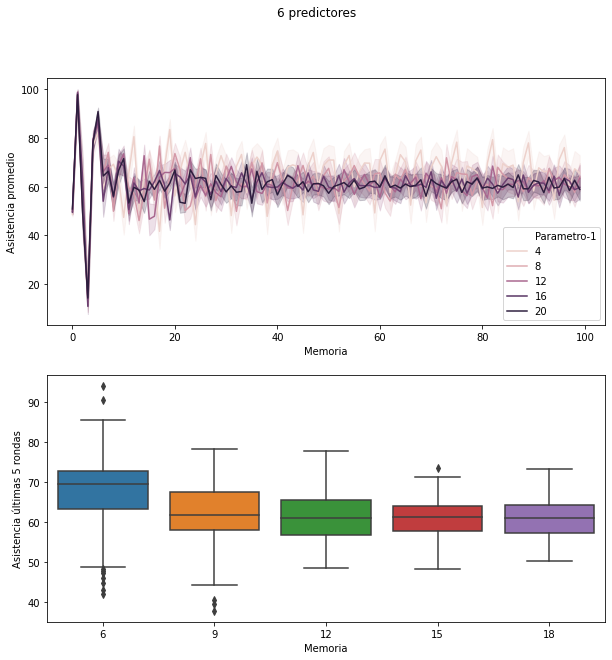

In [38]:
data['Parametro-1'] = data['Memoria']
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux1 = aux[aux['Ronda'] > rondas[-5]]
aux1 = aux1.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux1.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'], hue=aux['Parametro-1'], ax=ax[0])
sns.boxplot(x=aux1['Parametro-1'], y=aux1['Asistencia_total'], ax=ax[1])
ax[0].set_xlabel('Memoria')
#ax[0].set_ylim(50, 85)
ax[0].set_ylabel('Asistencia promedio')
#ax[0].set_title('Todas las rondas')
ax[1].set_xlabel('Memoria')
#ax[1].set_ylim(50, 85)
ax[1].set_ylabel('Asistencia últimas 5 rondas')
#ax[1].set_title('Ultimas 5 rondas')
fig.suptitle('6 predictores')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima promedio')

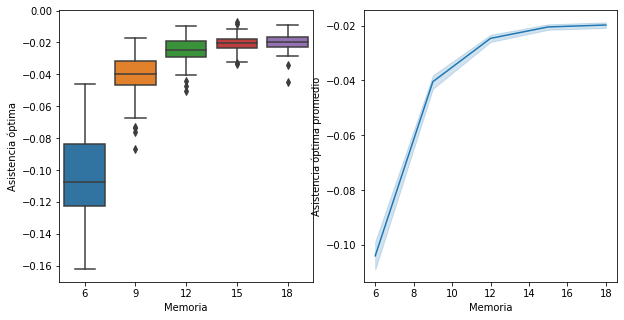

In [39]:
mu = 0.6
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (mu - aux['Asistencia'])#*(mu - aux['Asistencia'])
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = 2 * df['diferencia_con_umbral']/num_rondas
#df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Asistencia óptima')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Asistencia óptima promedio')

#### Recompensa total

In [40]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado
0            6          10000               0.4978
1            6          10001               0.5698
2            6          10002               0.5792
3            6          10003               0.5195
4            6          10004               0.4233

Text(0, 0.5, 'Puntaje NORMALIZADO promedio')

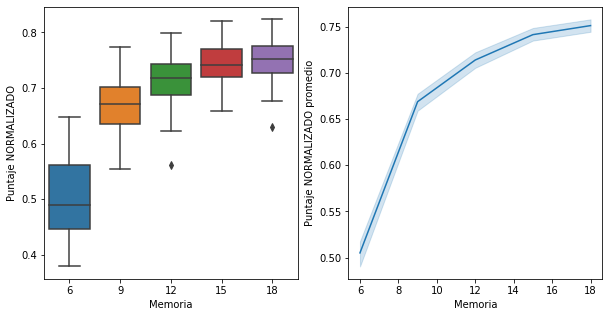

In [41]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Puntaje NORMALIZADO')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Puntaje NORMALIZADO promedio')

#### Distribución de la recompensa

In [42]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [43]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado  Gini
0            6          10000               0.4978   0.0
1            6          10001               0.5698   0.0
2            6          10002               0.5792   0.0
3            6          10003               0.5195   0.0
4            6          10004               0.4233   0.0

Text(0, 0.5, 'Índice de Gini')

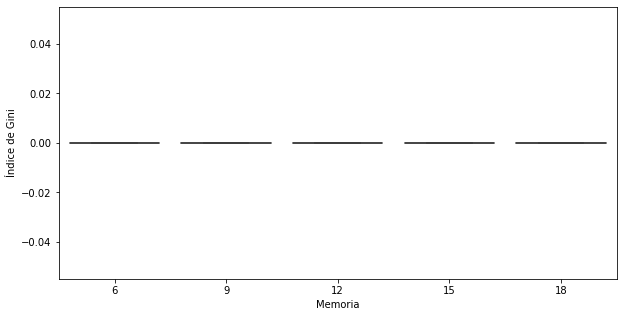

In [44]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Memoria')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [45]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

Parametro-1  Ronda      Politica_lag  cantidad_agentes
0            6      0         1-ciclico          4.202020
1            6      0  1-ciclico-espejo          4.484848

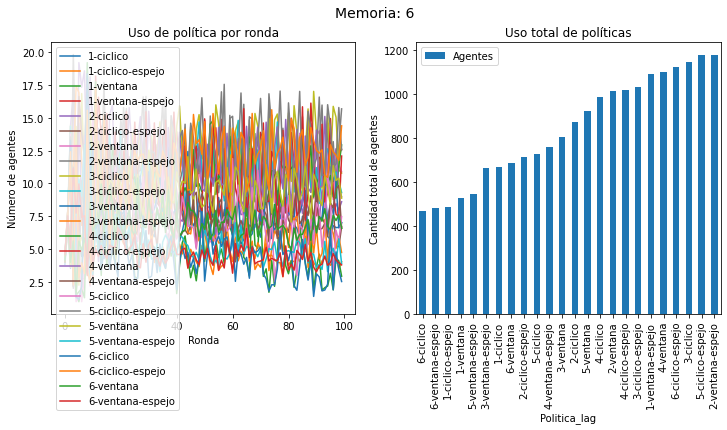

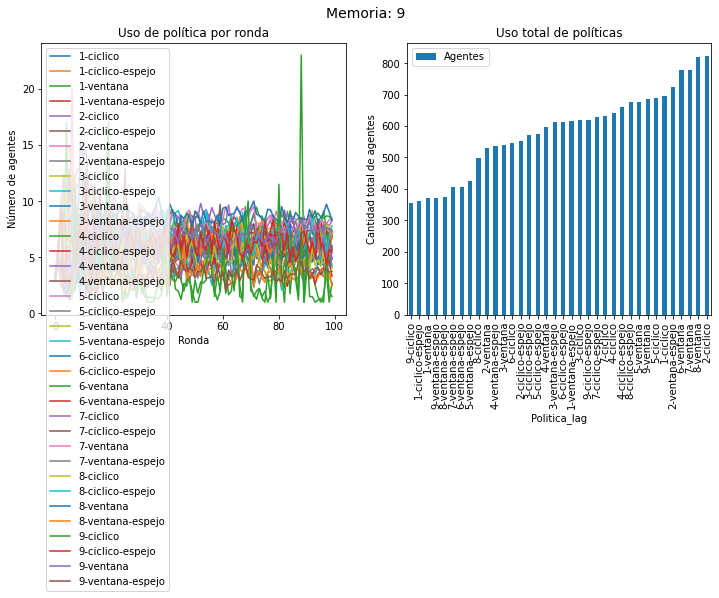

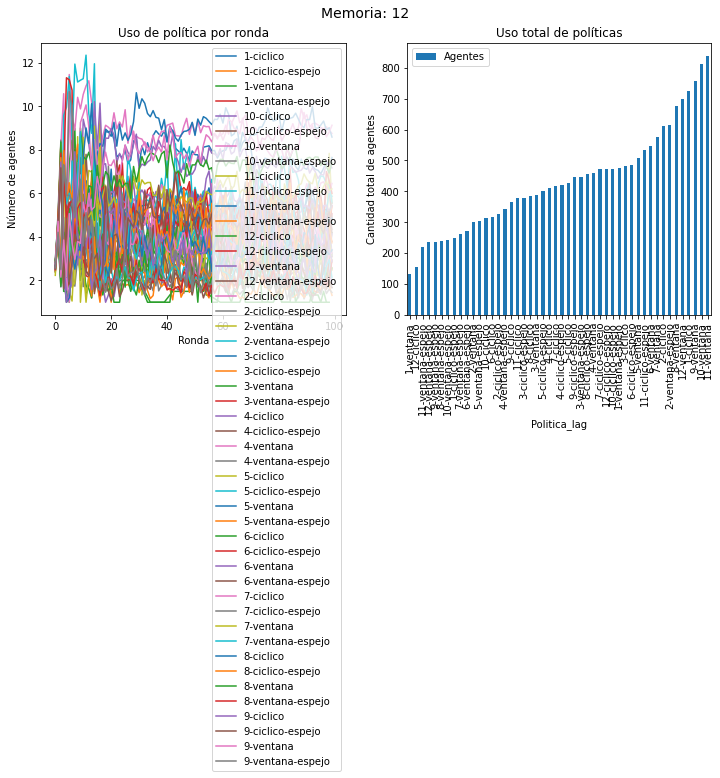

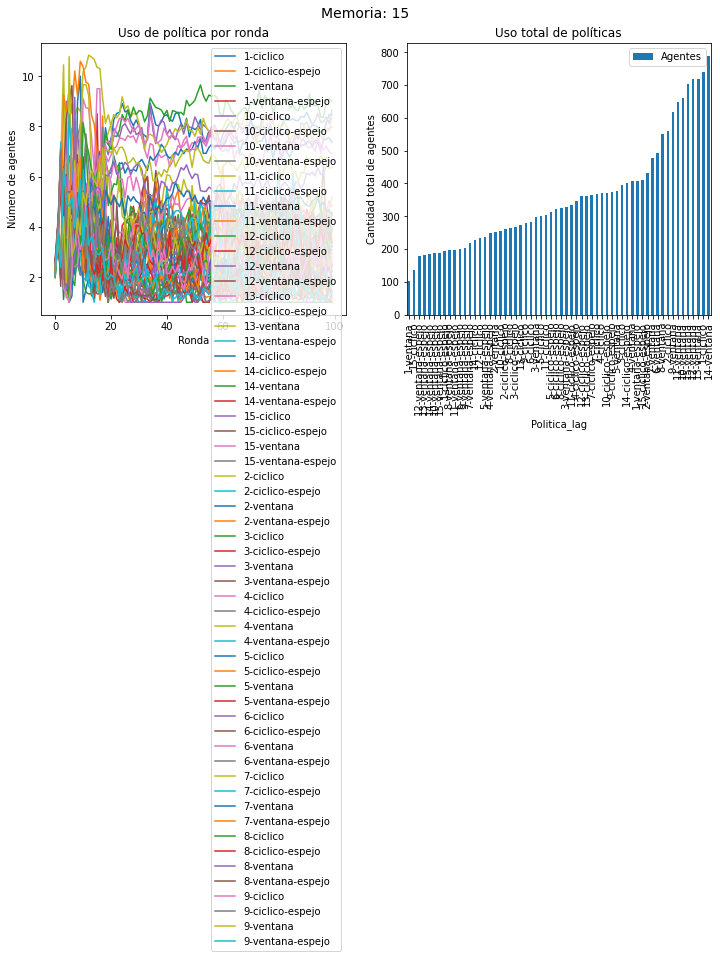

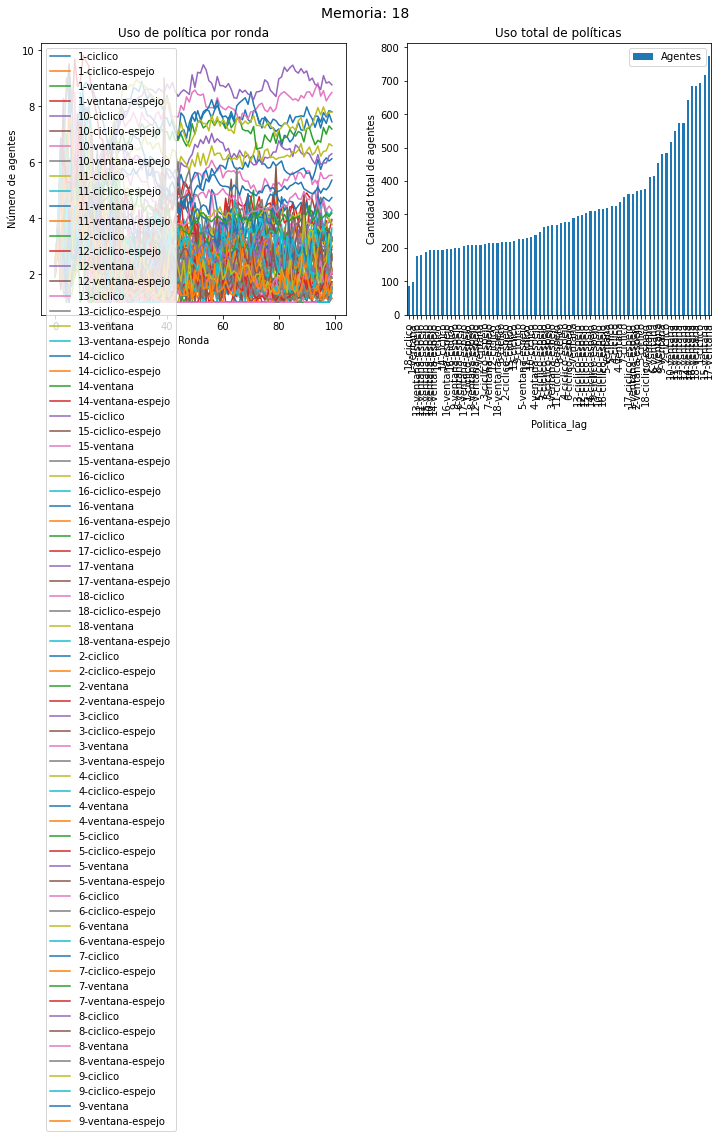

In [46]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.sort_values(by='cantidad_agentes', inplace=True)
    df1.columns = ['Agentes']
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Memoria: ' + str(r), fontsize=14)

In [47]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

Parametro-1 Politica_lag  Identificador   Puntaje
0            6    1-ciclico          10000 -0.469091
1            6    1-ciclico          10001 -0.490054
2            6    1-ciclico          10002 -0.461538
3            6    1-ciclico          10003 -0.637011
4            6    1-ciclico          10004 -0.467766

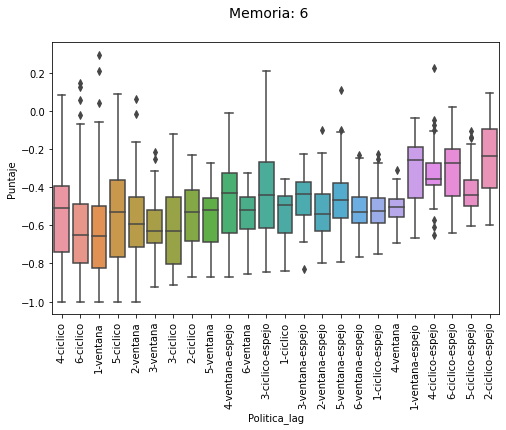

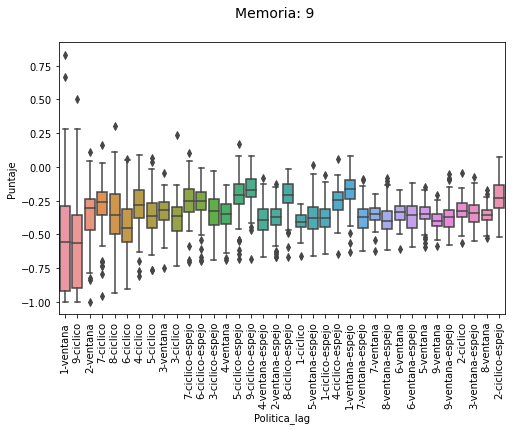

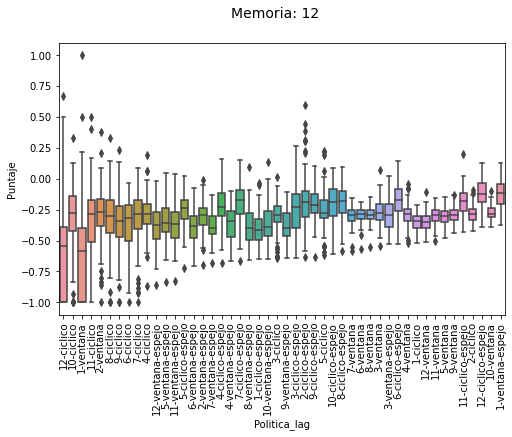

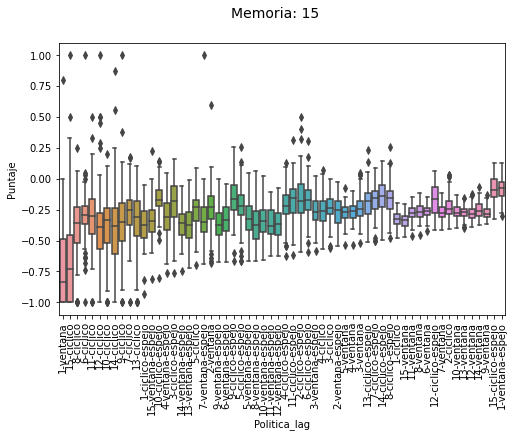

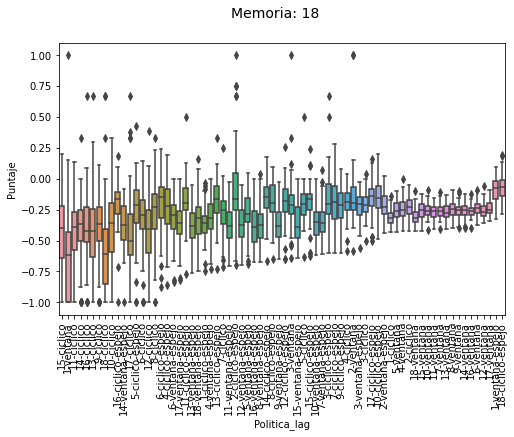

In [48]:
for p, Grp in df.groupby('Parametro-1'):
    grp = Grp.sort_values(by='Puntaje')
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Memoria: ' + str(p), fontsize=14)
    plt.xticks(rotation=90)
    

In [49]:
df = data.groupby(['Memoria', 'Identificador', 'Agente'])['Puntaje'].sum().reset_index()
df.sort_values(by='Puntaje', inplace=True)
df.head()

Memoria  Identificador  Agente  Puntaje
4124        6          10041      24      -71
4156        6          10041      56      -71
4139        6          10041      39      -71
7017        6          10070      17      -71
6242        6          10062      42      -70

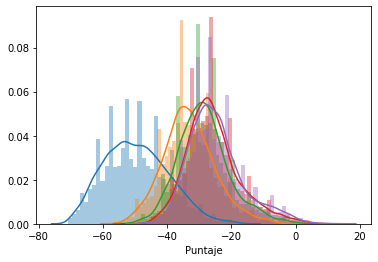

In [50]:
for key, grp in df.groupby('Memoria'):
    sns.distplot(grp['Puntaje'])

## Simulaciones con 9 predictores variando memoria:

In [51]:
###############
# Predictores
k = 9 
# Conectividad
p = '0.0'
###############
names=['Memoria','Num_predic','Identificador','Ronda','Agente','Estado','Puntaje','Politica']
df_list = []
memoria = [1, 3, 6, 9, 12, 15, 18]
for d in memoria:
    print(f"Leyendo datos sweep memoria {d} y predictores {k}")
    archivo = './data/simulacion-' + str(d) + "-" + str(k) + '-' + p + ".csv"
    print(f"Cargando datos de archivo {archivo}...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
        
data = pd.concat(df_list)
#data = data.iloc[1:]
data = data.dropna()
data['Memoria'] = data['Memoria'].astype(int)
data['Num_predic'] = data['Num_predic'].astype(int)
data['Identificador'] = data['Identificador'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
data['Politica'] = data['Politica'].astype(str)
data.head()

Leyendo datos sweep memoria 1 y predictores 9
Cargando datos de archivo ./data/simulacion-1-9-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 3 y predictores 9
Cargando datos de archivo ./data/simulacion-3-9-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 6 y predictores 9
Cargando datos de archivo ./data/simulacion-6-9-0.0.csv...
Archivo no existe! Saltando a siguiente opción
Leyendo datos sweep memoria 9 y predictores 9
Cargando datos de archivo ./data/simulacion-9-9-0.0.csv...
Listo
Leyendo datos sweep memoria 12 y predictores 9
Cargando datos de archivo ./data/simulacion-12-9-0.0.csv...
Listo
Leyendo datos sweep memoria 15 y predictores 9
Cargando datos de archivo ./data/simulacion-15-9-0.0.csv...
Listo
Leyendo datos sweep memoria 18 y predictores 9
Cargando datos de archivo ./data/simulacion-18-9-0.0.csv...
Listo


Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           9          18000      0       0       1        1   
1        9           9          18000      1       0       1       -1   
2        9           9          18000      2       0       0        0   
3        9           9          18000      3       0       0        0   
4        9           9          18000      4       0       1       -1   

           Politica  
0  3-ciclico-espejo  
1         1-ventana  
2         6-ventana  
3  5-ventana-espejo  
4  5-ventana-espejo

### Verificamos correctitud de los datos

In [52]:
data.shape

(4000000, 8)

In [53]:
data['Memoria'].value_counts()

18    1000000
15    1000000
12    1000000
9     1000000
Name: Memoria, dtype: int64

In [54]:
data['Agente'].value_counts()

99    40000
36    40000
26    40000
27    40000
28    40000
      ...  
69    40000
70    40000
71    40000
72    40000
0     40000
Name: Agente, Length: 100, dtype: int64

**Asistencia**

Text(0.5, 0.98, '9 predictores')

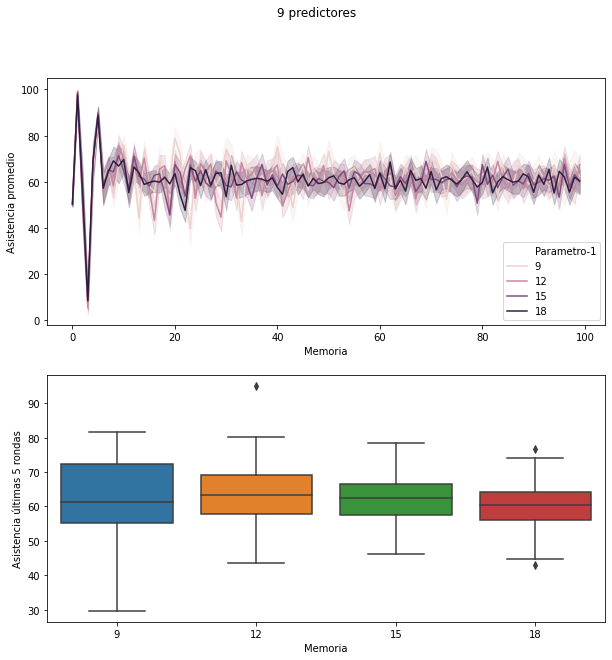

In [55]:
data['Parametro-1'] = data['Memoria']
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux1 = aux[aux['Ronda'] > rondas[-5]]
aux1 = aux1.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux1.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'], hue=aux['Parametro-1'], ax=ax[0])
sns.boxplot(x=aux1['Parametro-1'], y=aux1['Asistencia_total'], ax=ax[1])
ax[0].set_xlabel('Memoria')
#ax[0].set_ylim(50, 85)
ax[0].set_ylabel('Asistencia promedio')
#ax[0].set_title('Todas las rondas')
ax[1].set_xlabel('Memoria')
#ax[1].set_ylim(50, 85)
ax[1].set_ylabel('Asistencia últimas 5 rondas')
#ax[1].set_title('Ultimas 5 rondas')
fig.suptitle('9 predictores')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima promedio')

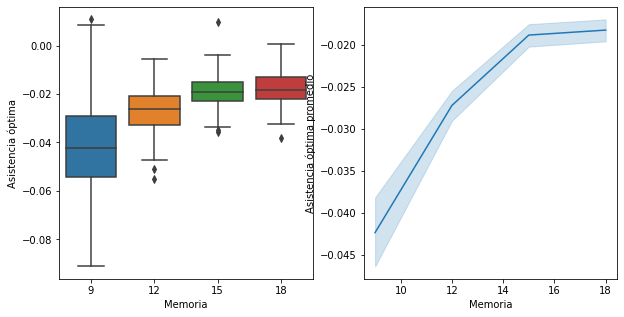

In [56]:
mu = 0.6
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (mu - aux['Asistencia'])#*(mu - aux['Asistencia'])
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = 2 * df['diferencia_con_umbral']/num_rondas
#df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Asistencia óptima')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Asistencia óptima promedio')

#### Recompensa total

In [57]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado
0            9          18000               0.6713
1            9          18001               0.6506
2            9          18002               0.6837
3            9          18003               0.6111
4            9          18004               0.6940

Text(0, 0.5, 'Puntaje NORMALIZADO promedio')

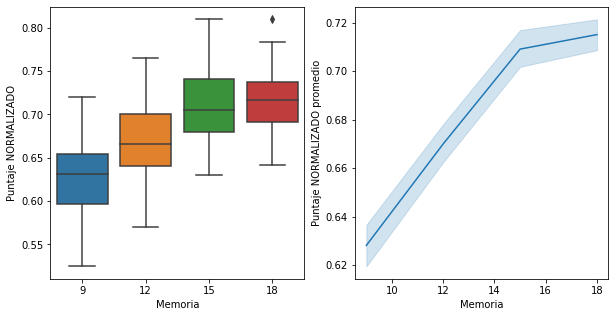

In [58]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
ax[0].set_xlabel('Memoria')
ax[0].set_ylabel('Puntaje NORMALIZADO')
ax[1].set_xlabel('Memoria')
ax[1].set_ylabel('Puntaje NORMALIZADO promedio')

#### Distribución de la recompensa

In [59]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [60]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado  Gini
0            9          18000               0.6713   0.0
1            9          18001               0.6506   0.0
2            9          18002               0.6837   0.0
3            9          18003               0.6111   0.0
4            9          18004               0.6940   0.0

Text(0, 0.5, 'Índice de Gini')

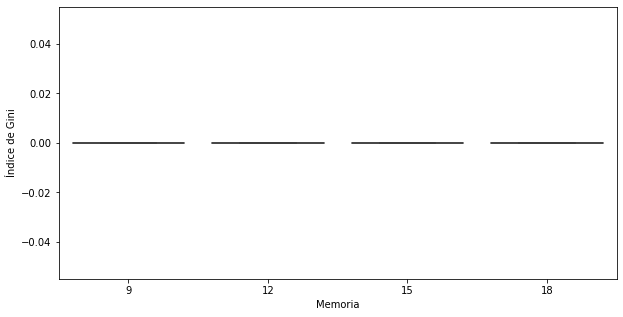

In [61]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Memoria')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [62]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

Parametro-1  Ronda      Politica_lag  cantidad_agentes
0            9      0         1-ciclico          2.860215
1            9      0  1-ciclico-espejo          2.921348

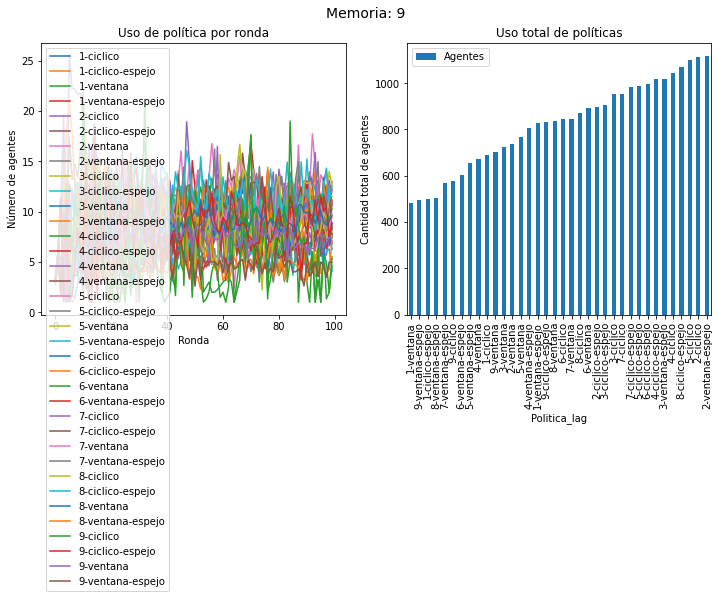

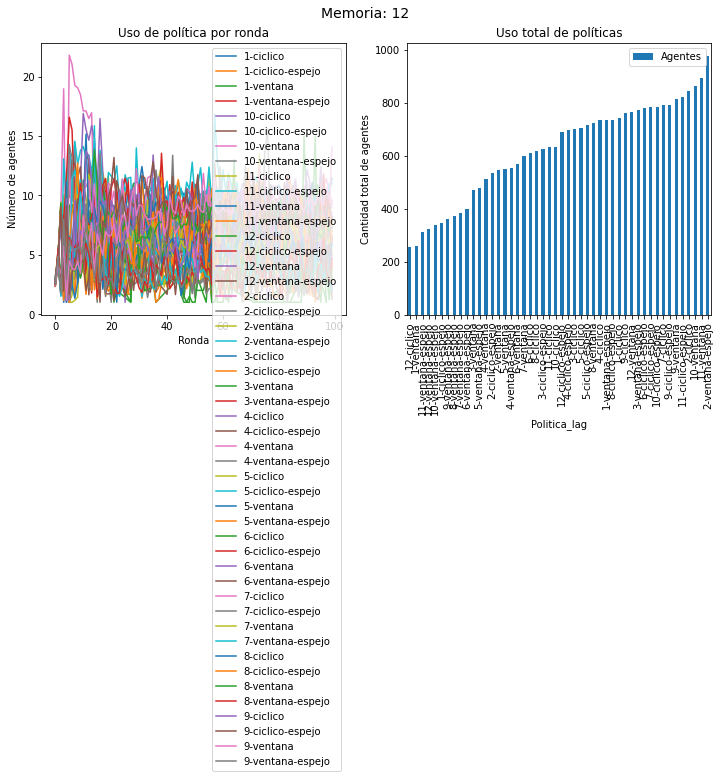

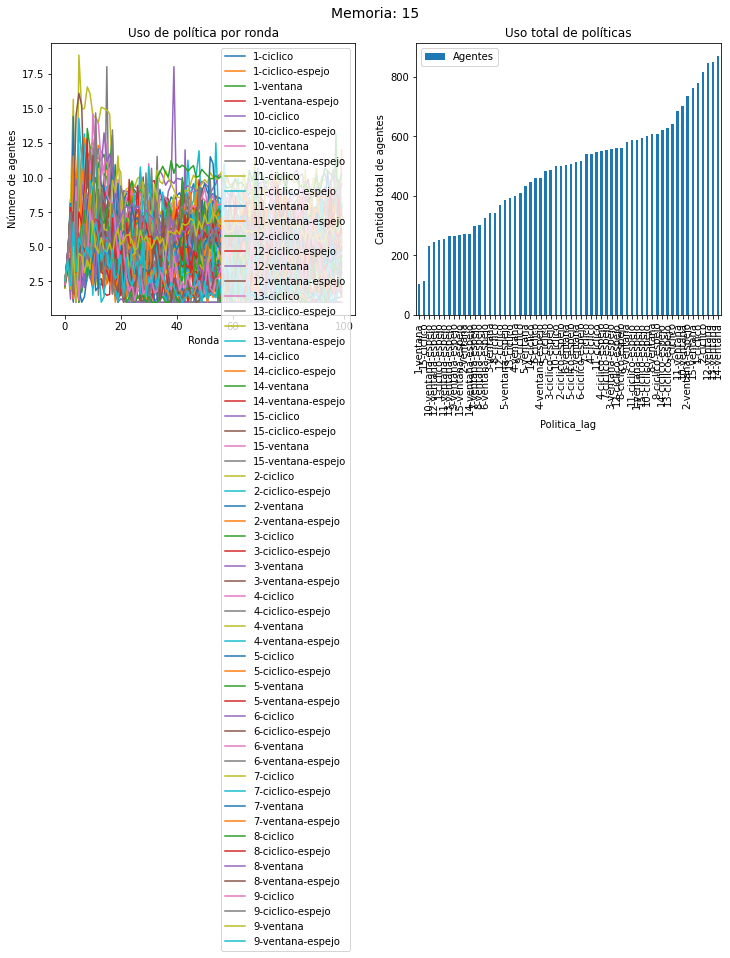

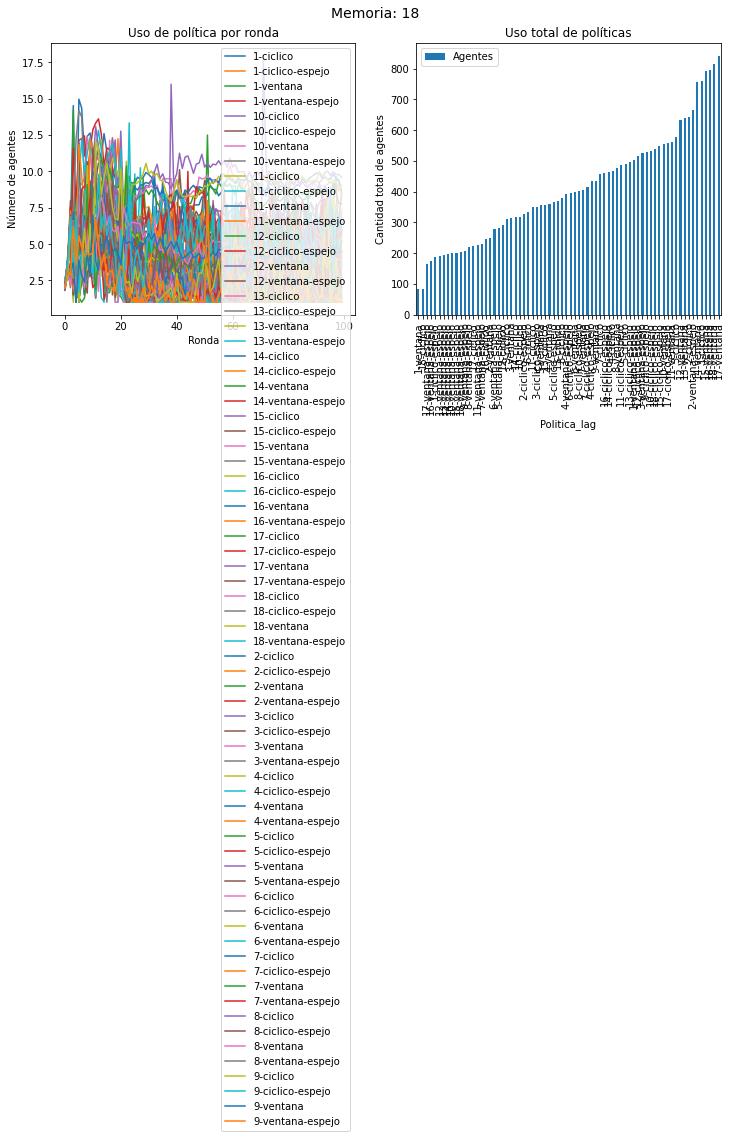

In [63]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.sort_values(by='cantidad_agentes', inplace=True)
    df1.columns = ['Agentes']
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Memoria: ' + str(r), fontsize=14)

In [64]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

Parametro-1 Politica_lag  Identificador   Puntaje
0            9    1-ciclico          18000 -0.424303
1            9    1-ciclico          18001 -0.252765
2            9    1-ciclico          18002 -0.314815
3            9    1-ciclico          18003 -0.503268
4            9    1-ciclico          18004 -0.393981

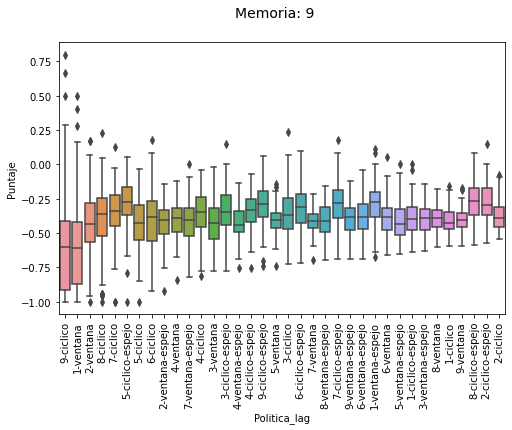

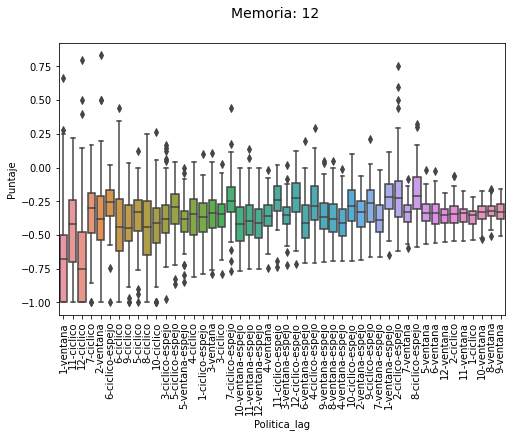

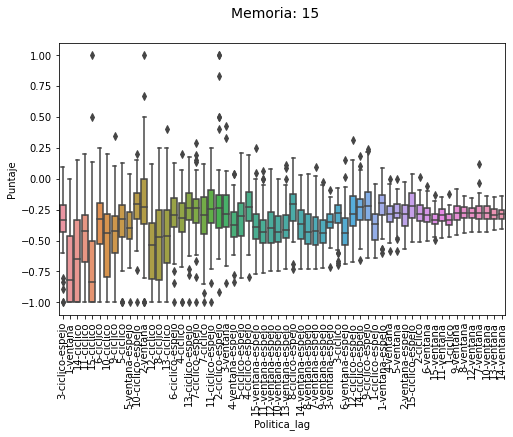

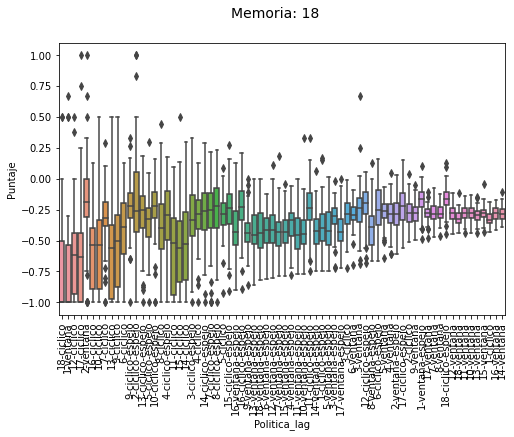

In [65]:
for p, Grp in df.groupby('Parametro-1'):
    grp = Grp.sort_values(by='Puntaje')
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Memoria: ' + str(p), fontsize=14)
    plt.xticks(rotation=90)
    

In [66]:
data.head()

Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           9          18000      0       0       1        1   
1        9           9          18000      1       0       1       -1   
2        9           9          18000      2       0       0        0   
3        9           9          18000      3       0       0        0   
4        9           9          18000      4       0       1       -1   

           Politica  Parametro-1      Politica_lag  
0  3-ciclico-espejo            9         1-ventana  
1         1-ventana            9         6-ventana  
2         6-ventana            9  5-ventana-espejo  
3  5-ventana-espejo            9  5-ventana-espejo  
4  5-ventana-espejo            9  5-ventana-espejo

In [67]:
df = data.groupby(['Memoria', 'Identificador', 'Agente'])['Puntaje'].sum().reset_index()
df.sort_values(by='Puntaje', inplace=True)
df.head()

Memoria  Identificador  Agente  Puntaje
9688        9          18096      88      -57
9671        9          18096      71      -57
9689        9          18096      89      -56
9678        9          18096      78      -56
9682        9          18096      82      -56

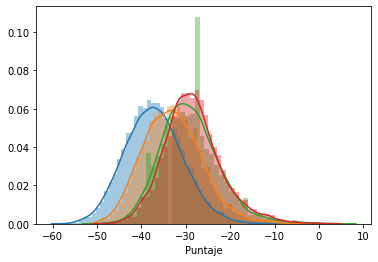

In [68]:
for key, grp in df.groupby('Memoria'):
    sns.distplot(grp['Puntaje'])

## Simulaciones con 9 predictores memoria 9 variando conectividad:

In [87]:
###############
# Predictores
k = 9 
# Conectividad
d = 9
###############
names=['Conectividad', 'Identificador','Ronda','Agente','Estado','Puntaje','Politica']
df_list = []
conectividades = [0.01 * x for x in range(10)] + [0.1 * x for x in range(1, 11)]
conectividades = [round(x, 2) for x in conectividades]
for p in conectividades:
    print(f"Leyendo datos sweep memoria {d} predictores {k} y conectividad {p}")
    archivo = './data/simulacion-' + str(d) + "-" + str(k) + '-' + str(p) + ".csv"
    print(f"Cargando datos de archivo {archivo}...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        aux['Conectividad'] = p
        print(aux.head(2))
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
 
data = pd.concat(df_list)
#data = data.iloc[1:]
data = data.dropna()
data['Conectividad'] = data['Conectividad'].astype(float)
#data['Memoria'] = data['Memoria'].astype(int)
#data['Num_predic'] = data['Num_predic'].astype(int)
data['Identificador'] = data['Identificador'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Agente'] = data['Agente'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Puntaje'] = data['Puntaje'].astype(int)
data['Politica'] = data['Politica'].astype(str)
data.head()

Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.0
Cargando datos de archivo ./data/simulacion-9-9-0.0.csv...
   Conectividad  Identificador  Ronda  Agente  Estado  Puntaje  \
9           0.0          18000      0       0       1        1   
9           0.0          18000      1       0       1       -1   

           Politica  
9  3-ciclico-espejo  
9         1-ventana  
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.01
Cargando datos de archivo ./data/simulacion-9-9-0.01.csv...
   Conectividad  Identificador  Ronda  Agente  Estado  Puntaje   Politica
9          0.01          18100      0       0       1        1  8-ciclico
9          0.01          18100      1       0       1       -1  2-ciclico
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.02
Cargando datos de archivo ./data/simulacion-9-9-0.02.csv...
   Conectividad  Identificador  Ronda  Agente  Estado  Puntaje  \
9          0.02          18200      0       0       0        0   

Conectividad  Identificador  Ronda  Agente  Estado  Puntaje  \
9           0.0          18000      0       0       1        1   
9           0.0          18000      1       0       1       -1   
9           0.0          18000      2       0       0        0   
9           0.0          18000      3       0       0        0   
9           0.0          18000      4       0       1       -1   

           Politica  
9  3-ciclico-espejo  
9         1-ventana  
9         6-ventana  
9  5-ventana-espejo  
9  5-ventana-espejo

### Verificamos correctitud de los datos

In [88]:
data.shape

(20000000, 7)

In [89]:
data['Conectividad'].value_counts()

1.00    1000000
0.50    1000000
0.05    1000000
0.10    1000000
0.80    1000000
0.70    1000000
0.06    1000000
0.20    1000000
0.40    1000000
0.03    1000000
0.02    1000000
0.01    1000000
0.08    1000000
0.04    1000000
0.30    1000000
0.60    1000000
0.90    1000000
0.09    1000000
0.07    1000000
0.00    1000000
Name: Conectividad, dtype: int64

In [90]:
data['Agente'].value_counts()

99    200000
36    200000
26    200000
27    200000
28    200000
       ...  
69    200000
70    200000
71    200000
72    200000
0     200000
Name: Agente, Length: 100, dtype: int64

**Asistencia**

In [ ]:
data['Parametro-1'] = data['Conectividad']
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux1 = aux[aux['Ronda'] > rondas[-5]]
aux1 = aux1.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux1.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'], hue=aux['Parametro-1'], ax=ax[0])
sns.boxplot(x=aux1['Parametro-1'], y=aux1['Asistencia_total'], ax=ax[1])
ax[0].set_xlabel('Conectividad')
#ax[0].set_ylim(50, 85)
ax[0].set_ylabel('Asistencia promedio')
#ax[0].set_title('Todas las rondas')
ax[1].set_xlabel('Conectividad')
#ax[1].set_ylim(50, 85)
ax[1].set_ylabel('Asistencia últimas 5 rondas')
#ax[1].set_title('Ultimas 5 rondas')
fig.suptitle('6 predictores')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima promedio')

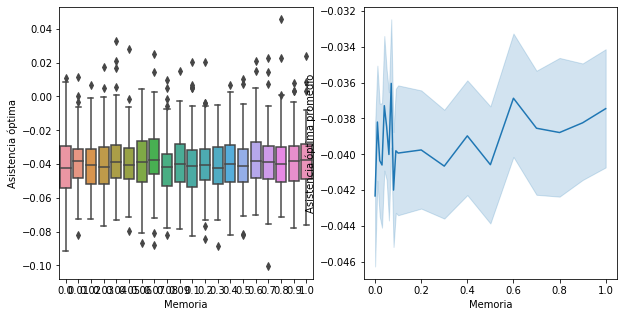

In [92]:
mu = 0.6
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (mu - aux['Asistencia'])#*(mu - aux['Asistencia'])
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = 2 * df['diferencia_con_umbral']/num_rondas
#df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
ax[0].set_xlabel('Conectividad')
ax[0].set_ylabel('Asistencia óptima')
ax[1].set_xlabel('Conectividad')
ax[1].set_ylabel('Asistencia óptima promedio')

#### Recompensa total

In [40]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado
0            6          10000               0.4978
1            6          10001               0.5698
2            6          10002               0.5792
3            6          10003               0.5195
4            6          10004               0.4233

Text(0, 0.5, 'Puntaje NORMALIZADO promedio')

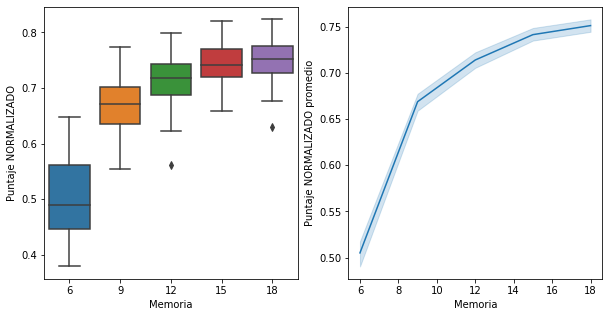

In [41]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
ax[0].set_xlabel('Conectividad')
ax[0].set_ylabel('Puntaje NORMALIZADO')
ax[1].set_xlabel('Conectividad')
ax[1].set_ylabel('Puntaje NORMALIZADO promedio')

#### Distribución de la recompensa

In [42]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [43]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

Parametro-1  Identificador  Puntaje normalizado  Gini
0            6          10000               0.4978   0.0
1            6          10001               0.5698   0.0
2            6          10002               0.5792   0.0
3            6          10003               0.5195   0.0
4            6          10004               0.4233   0.0

Text(0, 0.5, 'Índice de Gini')

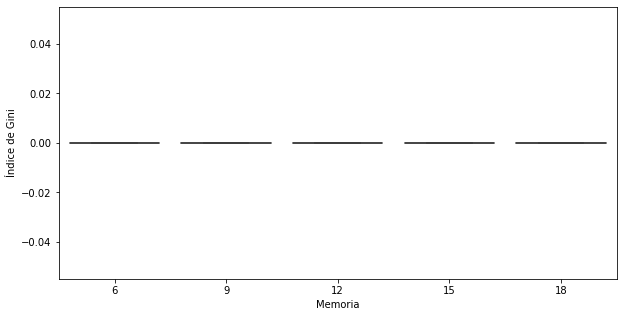

In [44]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Memoria')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [45]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

Parametro-1  Ronda      Politica_lag  cantidad_agentes
0            6      0         1-ciclico          4.202020
1            6      0  1-ciclico-espejo          4.484848

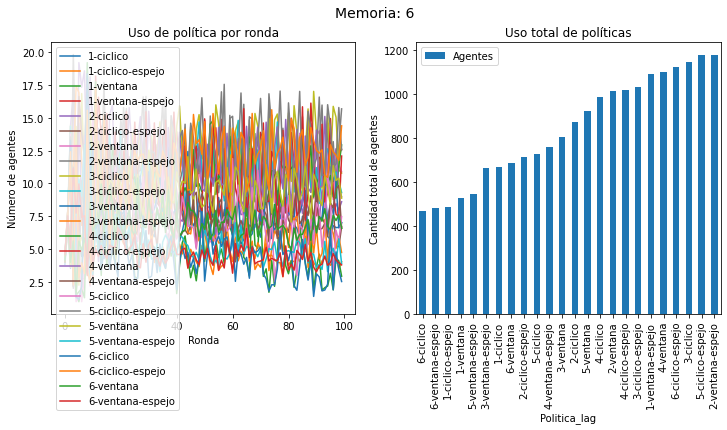

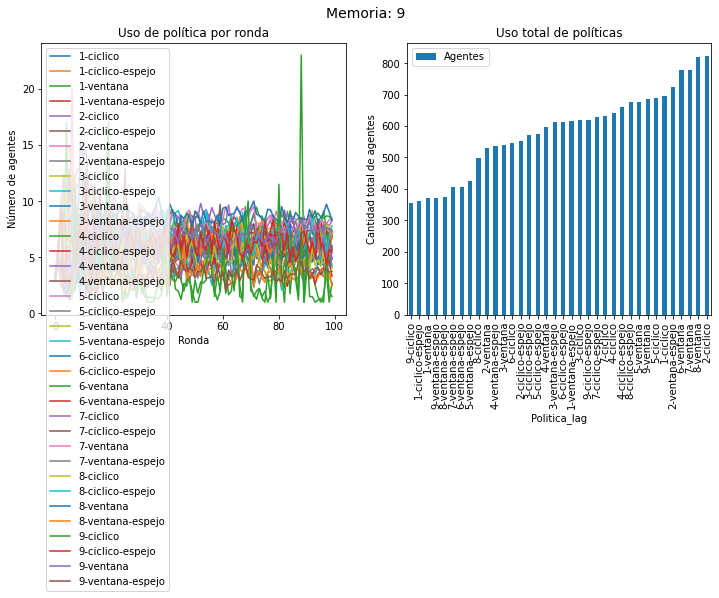

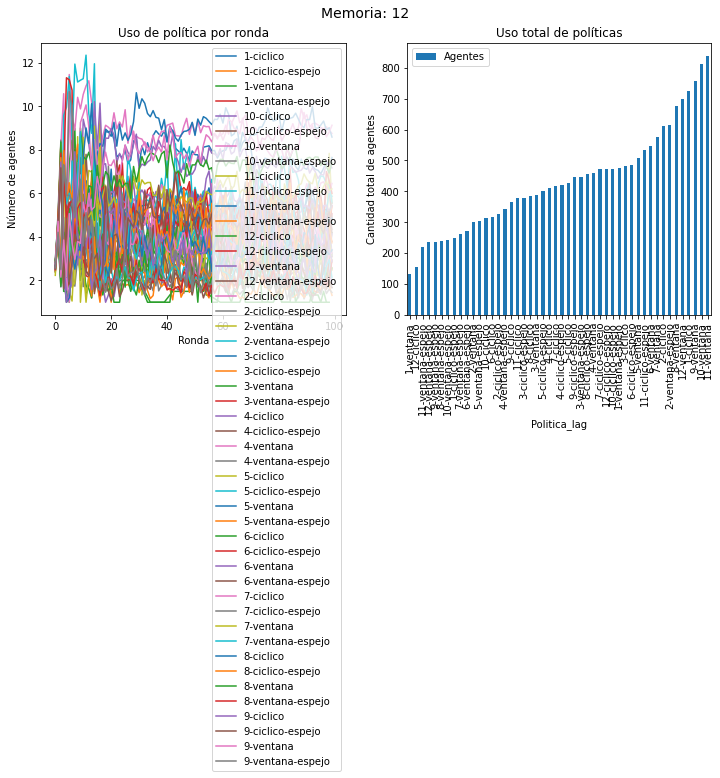

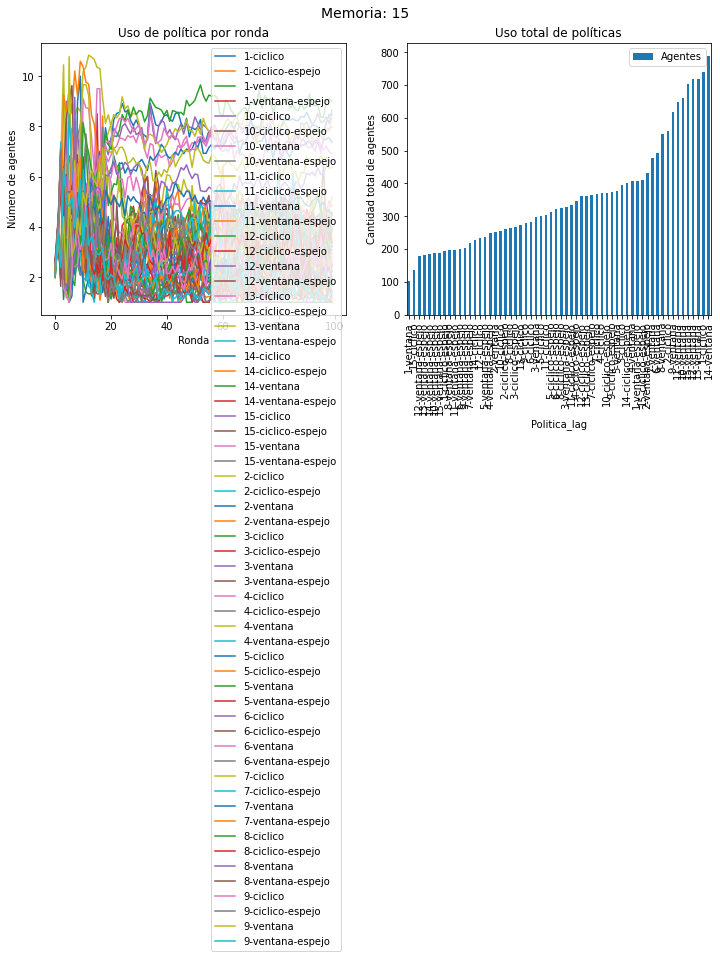

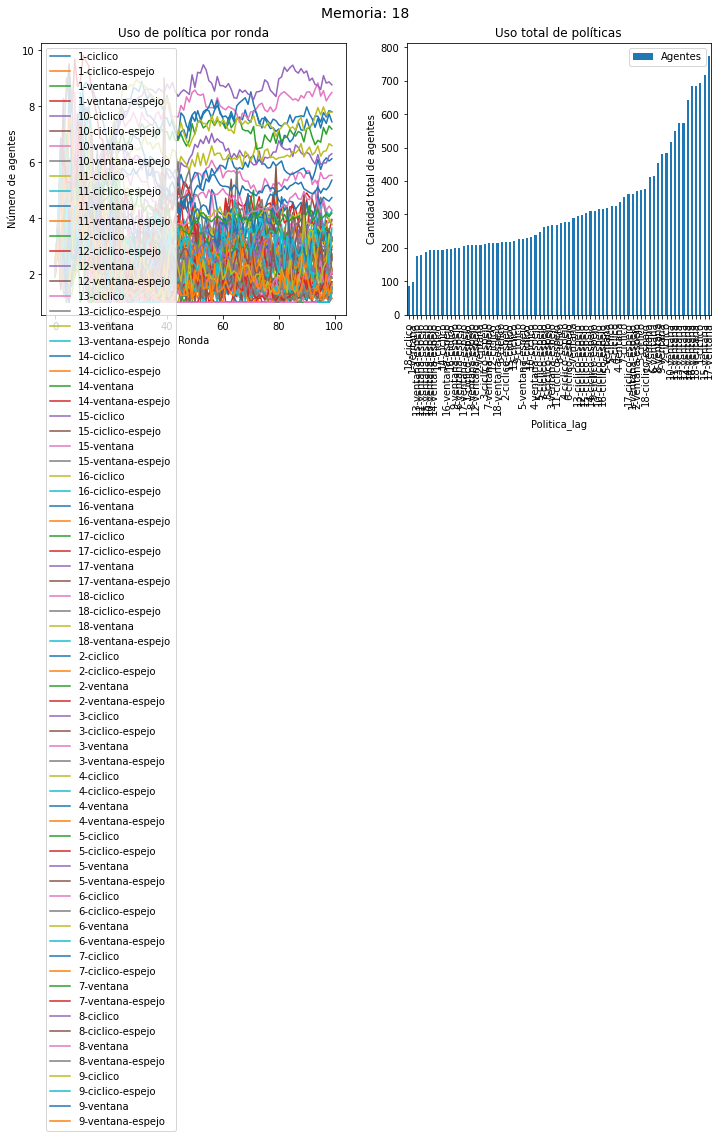

In [46]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.sort_values(by='cantidad_agentes', inplace=True)
    df1.columns = ['Agentes']
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Conectividad: ' + str(r), fontsize=14)

In [47]:
data['Politica_lag'] = data.groupby(['Parametro-1', 'Identificador', 'Agente'])['Politica'].transform('shift', -1)
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

Parametro-1 Politica_lag  Identificador   Puntaje
0            6    1-ciclico          10000 -0.469091
1            6    1-ciclico          10001 -0.490054
2            6    1-ciclico          10002 -0.461538
3            6    1-ciclico          10003 -0.637011
4            6    1-ciclico          10004 -0.467766

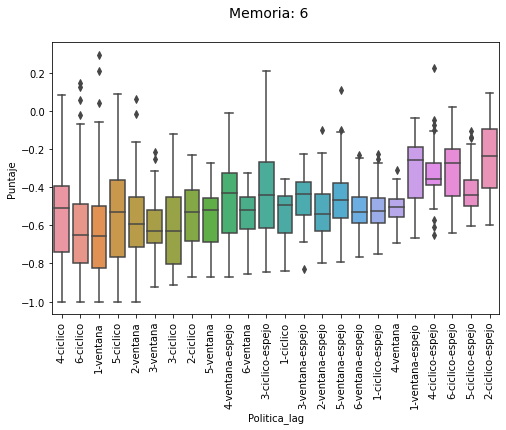

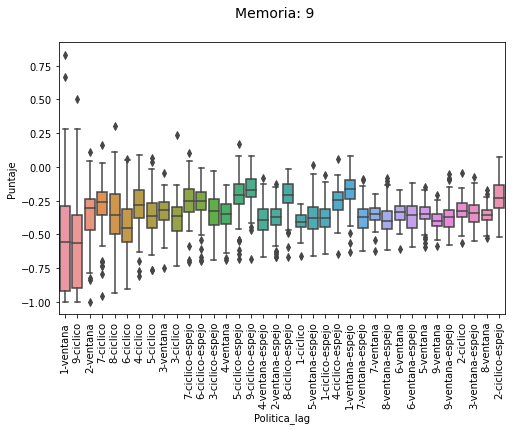

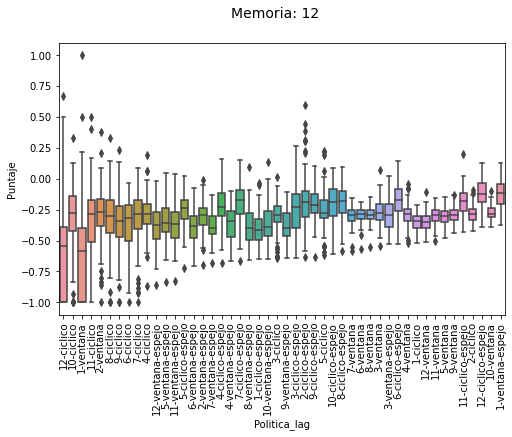

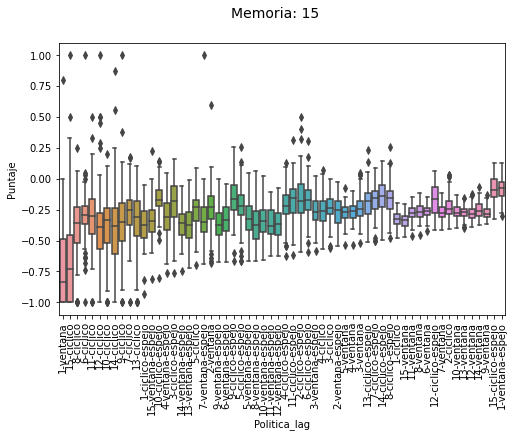

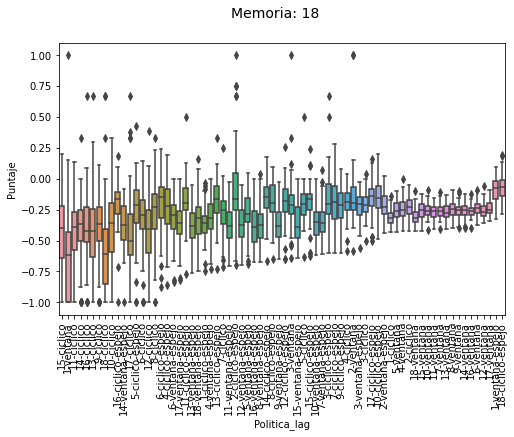

In [48]:
for p, Grp in df.groupby('Parametro-1'):
    grp = Grp.sort_values(by='Puntaje')
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Memoria: ' + str(p), fontsize=14)
    plt.xticks(rotation=90)
    

In [49]:
df = data.groupby(['Memoria', 'Identificador', 'Agente'])['Puntaje'].sum().reset_index()
df.sort_values(by='Puntaje', inplace=True)
df.head()

Memoria  Identificador  Agente  Puntaje
4124        6          10041      24      -71
4156        6          10041      56      -71
4139        6          10041      39      -71
7017        6          10070      17      -71
6242        6          10062      42      -70

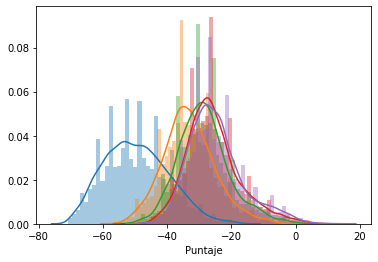

In [50]:
for key, grp in df.groupby('Memoria'):
    sns.distplot(grp['Puntaje'])

1. La conectividad influye en el comportamiento del sistema
* 
